# Introduction to PyTorch with NLP

PyTorch is a popular open-source deep learning framework developed by Facebook’s AI Research lab that provides flexibility and dynamic computational graphs, making it highly favored for research and production purposes. With its intuitive interface, PyTorch allows developers to build and train complex neural networks with ease.

A computation graph is a network of nodes where each node represents an operation or variable, and the edges represent data dependencies between operations. Dynamic computation graphs are particularly useful in Natural Language Processing (NLP), where the input data, such as sentences or sequences, can vary in length and structure. PyTorch’s dynamic nature allows the graph to adapt to different input shapes and sizes, making it easier to handle complex tasks like sequence-to-sequence learning, attention mechanisms, and more.

- A good tutorial on PyTorch: https://www.youtube.com/watch?v=OIenNRt2bjg
- Detailed Documentation of PyTorch: https://pytorch.org/docs/stable/index.html

## 1. PyTorch Tensors and Basics

Tensors are the core data structure in PyTorch, analogous to arrays and matrices in NumPy but with additional capabilities for autodifferentiation and easier device management. A tensor is a multi-dimensional array that serves as the basic building block of PyTorch.

Tensor functions: https://pytorch.org/docs/stable/tensors.html

In [436]:
import torch
import numpy as np

### 1.1. Creating Tensors

In [437]:
a = torch.ones(3,3)
print(a)
print(type(a)) # checking the data type of a
print(a.shape) # checking the shape of a tensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
<class 'torch.Tensor'>
torch.Size([3, 3])


In [438]:
# Create a tensor from a Python list
data = [[1, 2], [3, 4]]
tensor_from_list = torch.tensor(data)
print("Tensor from list:\n", tensor_from_list)

# Create a tensor filled with zeros
zeros = torch.zeros((2, 3))
print("\nZeros tensor:\n", zeros)

# Create a tensor filled with ones
ones = torch.ones((2, 3))
print("\nOnes tensor:\n", ones)

# Create a tensor with random values
random_tensor = torch.rand((2, 3))
print("\nRandom tensor:\n", random_tensor)

# Create a tensor with uninitialized values (values will be whatever is in memory)
uninitialized = torch.empty((2, 3))
print("\nUninitialized tensor:\n", uninitialized)


Tensor from list:
 tensor([[1, 2],
        [3, 4]])

Zeros tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random tensor:
 tensor([[0.1128, 0.4192, 0.0497],
        [0.6678, 0.1874, 0.1211]])

Uninitialized tensor:
 tensor([[ 5.3335e+03,  4.5801e-41, -2.4720e+25],
        [ 3.0910e-41,  4.4842e-44,  0.0000e+00]])


### 1.2. Indexing and Splicing

In [439]:
# Create a 3x3 tensor
tensor = torch.arange(9).reshape(3, 3)
print("Original tensor:\n", tensor)

# Access a single element (row 2, column 3)
element = tensor[1, 2]
print("\nElement at (1, 2):", element)

# Slice a sub-tensor (first two rows and columns)
sub_tensor = tensor[:2, :2]
print("\nSliced sub-tensor:\n", sub_tensor)

# Modify a specific element
tensor[0, 0] = 100
print("\nModified tensor:\n", tensor)


Original tensor:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

Element at (1, 2): tensor(5)

Sliced sub-tensor:
 tensor([[0, 1],
        [3, 4]])

Modified tensor:
 tensor([[100,   1,   2],
        [  3,   4,   5],
        [  6,   7,   8]])


### Arithmetic Operations

In [440]:
# Create two tensors
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Addition
add = a + b
print("Addition:", add)

# Subtraction
sub = a - b
print("Subtraction:", sub)

# Multiplication
mul = a * b
print("Multiplication:", mul)

# Division
div = b / a
print("Division:", div)


Addition: tensor([5, 7, 9])
Subtraction: tensor([-3, -3, -3])
Multiplication: tensor([ 4, 10, 18])
Division: tensor([4.0000, 2.5000, 2.0000])


### 1.3. Matrix Operations

In [441]:
# Create two 2x3 and 3x2 tensors
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
B = torch.tensor([[7, 8], [9, 10], [11, 12]])

# Matrix multiplication
C = torch.matmul(A, B)
print("Matrix multiplication result:\n", C)

# Transpose a tensor
A_transposed = A.t()
print("\nTransposed A:\n", A_transposed)


Matrix multiplication result:
 tensor([[ 58,  64],
        [139, 154]])

Transposed A:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])


#### Common Errors with Matrix Multiplications

Matrix multiplication requires that the number of columns in the first matrix matches the number of rows in the second matrix. If these dimensions don't align, PyTorch will raise a RuntimeError.

Solution: Ensure that the tensors have compatible shapes. For example, if A has shape (2, 3), then B should have shape (3, N) where N is any integer.

In [442]:
import torch

# Create two tensors with incompatible shapes for matrix multiplication
A = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
B = torch.tensor([[7, 8], [9, 10]])       # Shape: (2, 2)

# Attempt matrix multiplication (this will raise an error)
try:
    C = torch.matmul(A, B)
except RuntimeError as e:
    print("Error:", e)


Error: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x2)


### 1.4. Reshaping Tensors

In [443]:
# Create a 4x4 tensor
tensor = torch.arange(16).reshape(4, 4)
print("Original tensor:\n", tensor)

# Reshape to 2x8
reshaped = tensor.view(2, 8)
print("\nReshaped to 2x8:\n", reshaped)

# Flatten the tensor
flattened = tensor.view(-1)
print("\nFlattened tensor:", flattened)


Original tensor:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

Reshaped to 2x8:
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]])

Flattened tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])


### 1.5. Concatenating Tensors

In [444]:
# Create two tensors
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Concatenate along rows (dim=0)
concat_rows = torch.cat((a, b), dim=0)
print("Concatenated along rows:\n", concat_rows)

# Concatenate along columns (dim=1)
concat_cols = torch.cat((a, b), dim=1)
print("\nConcatenated along columns:\n", concat_cols)


Concatenated along rows:
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

Concatenated along columns:
 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


#### Common Pitfall

This is a common pitfall that in-compatible tensors are concatenated. In order to correctly concatenate the tensor, the dimensions other than the one it is concatenated on must be same.

In [445]:
# Create two tensors with incompatible shapes for concatenation
a = torch.tensor([[1, 2], [3, 4]])  # Shape: (2, 2)
b = torch.tensor([[5, 6, 7], [8, 9, 10]])  # Shape: (2, 3)

# Attempt concatenation along rows (dim=0)
try:
    result = torch.cat((a, b), dim=0)
except RuntimeError as e:
    print("Error:", e)

# Attempt concatenation along columns: why will it work?
result = torch.cat((a, b), dim=1)
print(result)

Error: Sizes of tensors must match except in dimension 0. Expected size 2 but got size 3 for tensor number 1 in the list.
tensor([[ 1,  2,  5,  6,  7],
        [ 3,  4,  8,  9, 10]])


### 1.6. Transposing and Permuting

In [446]:
# Create a 2x3 tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Original tensor:\n", tensor)

# Transpose (swap dimensions)
transposed = tensor.t()
print("\nTransposed tensor:\n", transposed)

# For tensors with more than 2 dimensions, use permute
tensor_3d = torch.arange(24).reshape(2, 3, 4)
print("\nOriginal 3D tensor shape:", tensor_3d.shape)

# Permute dimensions to (3, 2, 4)
permuted = tensor_3d.permute(1, 0, 2)
print("Permuted tensor shape:", permuted.shape)


Original tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])

Transposed tensor:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])

Original 3D tensor shape: torch.Size([2, 3, 4])
Permuted tensor shape: torch.Size([3, 2, 4])


### 1.7. Reduction Operations

In [447]:
# Create a tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Sum all elements
total_sum = torch.sum(x)
print("Total sum:", total_sum)

# Sum along a specific dimension (rows)
sum_dim0 = torch.sum(x, dim=0)
print("\nSum along dim=0 (columns):", sum_dim0)

# Mean along a specific dimension (columns)
mean_dim1 = torch.mean(x.float(), dim=1)
print("\nMean along dim=1 (rows):", mean_dim1)

# Maximum value and its index
max_val, max_idx = torch.max(x, dim=1)
print("\nMaximum values:", max_val)
print("Indices of maximum values:", max_idx)


Total sum: tensor(21)

Sum along dim=0 (columns): tensor([5, 7, 9])

Mean along dim=1 (rows): tensor([2., 5.])

Maximum values: tensor([3, 6])
Indices of maximum values: tensor([2, 2])


#### Common pitfall in Reduction Operations

The dimension specified should be valid

In [448]:
# Create a 2x3 tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x.shape)
print('Valid dimensions -', 0, 'to', len(x.shape)-1)
# Attempt to sum along an invalid dimension
try:
    result = torch.sum(x, dim=2)
except IndexError as e:
    print("Error:", e)


torch.Size([2, 3])
Valid dimensions - 0 to 1
Error: Dimension out of range (expected to be in range of [-2, 1], but got 2)


### 1.8. Automatic Differentiation

In [449]:
# Create a tensor with gradient tracking
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Perform operations
y = x * 2
print(y)
z = y.mean()

# Compute gradients
z.backward()

print("Gradient of z w.r. to x:", x.grad)


tensor([2., 4., 6.], grad_fn=<MulBackward0>)
Gradient of z w.r. to x: tensor([0.6667, 0.6667, 0.6667])


### 1.9. Device of tensors

In PyTorch, the location of tensors—whether on a CPU or GPU—directly impacts the performance and functionality of your code. Tensors can be stored on different devices, and operations on tensors must be performed on the same device to avoid errors and inefficiencies.

Importance -

1. Performance Optimization: Moving tensors to the GPU can significantly accelerate computations, as GPUs are designed to handle matrix operations much more efficiently than CPUs. This is especially important for training deep learning models where large amounts of data and complex operations are involved.
2. Error Prevention: PyTorch requires all tensors involved in a computation to be on the same device. If operations are attempted between tensors on different devices (e.g., adding a CPU tensor to a GPU tensor), it will result in a runtime error like RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!. Properly managing tensor locations ensures compatibility and prevents such errors.
3. Memory Management: GPUs have limited memory compared to CPUs. Properly managing tensor locations helps efficiently utilize GPU memory and avoid issues like out-of-memory errors. Moving tensors to the appropriate device only when needed can help balance memory usage across devices.


Below is a code snippet explaining critical aspects of tensor location management in PyTorch, highlighting performance benefits and common pitfalls.

In [450]:
import torch

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else ('mps' if torch.backends.mps.is_available() else "cpu"))

# Create a tensor on the CPU
x_cpu = torch.tensor([1.0, 2.0, 3.0])

# Create a tensor on the GPU (if available)
x_gpu = torch.tensor([4.0, 5.0, 6.0], device=device)

# Demonstrating Performance Optimization by moving CPU tensor to GPU
# Moving x_cpu to the GPU can accelerate computations
x_cpu = x_cpu.to(device)

# Performing operations on the same device (GPU in this case)
result = x_cpu + x_gpu
print("Result on GPU:", result)
print('\n')
# Demonstrating Error Prevention
# This will cause an error if x_cpu is not moved to the GPU
try:
    # Attempting an operation between tensors on different devices
    x_cpu = torch.tensor([1.0, 2.0, 3.0])  # Back on CPU
    error_result = x_cpu + x_gpu
except RuntimeError as e:
    print("Error:", e)
    
print('\n')
# Demonstrating Memory Management
# Moving the result back to the CPU to free up GPU memory
result = result.to("cpu")
print("Result moved back to CPU:", result)

Result on GPU: tensor([5., 7., 9.], device='cuda:0')


Error: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


Result moved back to CPU: tensor([5., 7., 9.])


### 1.10. Broadcasting

Broadcasting is a method used in PyTorch (and other libraries like NumPy) that allows arithmetic operations on tensors of different shapes by automatically expanding the smaller tensor(s) to match the shape of the larger one. Broadcasting follows a set of rules to make the tensors compatible without explicitly copying data, allowing efficient computation even when the shapes initially do not match.

#### How is Broadcasting Done?

Broadcasting follows a set of rules to determine how to expand the smaller tensor to match the shape of the larger one:

1. Alignment from the Right: Tensors are aligned from the right when comparing their shapes. For instance, to broadcast (4, 3, 2) with (3, 2), align as follows:

$$
(4, 3, 2) \\
( , 3, 2)
$$

2. Dimension Compatibility: Two dimensions are compatible if:
- They are equal.
- One of them is 1. In this case, the dimension with 1 is stretched to match the other dimension.
3. Expansion: Dimensions with 1 are virtually expanded to match the corresponding dimension of the other tensor without physically copying data.

Consider two tensors A and B:

- Let A be of shape (3, 1):

$$
A =
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
$$

- Let B be of shape (1, 4):

$$
B =
\begin{bmatrix}
10 & 20 & 30 & 40
\end{bmatrix}
$$

When performing the operation A + B, broadcasting expands A and B to a compatible shape (3, 4):

1. Expand A along columns:

$$
A_{\text{expanded}} =
\begin{bmatrix}
1 & 1 & 1 & 1 \\
2 & 2 & 2 & 2 \\
3 & 3 & 3 & 3
\end{bmatrix}
$$

2. Expand B along rows:

$$
B_{\text{expanded}} =
\begin{bmatrix}
10 & 20 & 30 & 40 \\
10 & 20 & 30 & 40 \\
10 & 20 & 30 & 40
\end{bmatrix}
$$

Now, you can perform element-wise addition:

$$
A + B =
\begin{bmatrix}
1+10 & 1+20 & 1+30 & 1+40 \\
2+10 & 2+20 & 2+30 & 2+40 \\
3+10 & 3+20 & 3+30 & 3+40
\end{bmatrix} =
\begin{bmatrix}
11 & 21 & 31 & 41 \\
12 & 22 & 32 & 42 \\
13 & 23 & 33 & 43
\end{bmatrix}
$$

In [451]:
import torch

# 2D tensor (batch of vectors)
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("2D Tensor:")
print(tensor_2d)

# 1D tensor (vector)
tensor_1d = torch.tensor([10, 20, 30])
print("1D Tensor:")
print(tensor_1d)

# Broadcasting
result = tensor_2d + tensor_1d
print("Result after broadcasting:")
print(result)

2D Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
1D Tensor:
tensor([10, 20, 30])
Result after broadcasting:
tensor([[11, 22, 33],
        [14, 25, 36]])


In [452]:
import torch

# Tensor with shape (2, 3)
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("2D Tensor:")
print(tensor_2d)

# Tensor with shape (2, 2) - This is incompatible for broadcasting
tensor_incompatible = torch.tensor([[10, 20], [30, 40]])
print("Incompatible Tensor:")
print(tensor_incompatible)

try:
    result = tensor_2d + tensor_incompatible
except RuntimeError as e:
    print(f"Error: {e}")

2D Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Incompatible Tensor:
tensor([[10, 20],
        [30, 40]])
Error: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1


## 2. Multiclass Text Classification

We will explore multi-class classification using a real-world dataset of tweets annotated with various emotions. The goal is to build a model that can accurately classify the emotion expressed in a given tweet into one of several categories, such as sadness, enthusiasm, anger, joy, and others.

The dataset tweet_emotions.csv contains three columns:

1. tweet_id: A unique identifier for each tweet.
2. sentiment: The emotion or sentiment expressed in the tweet. This is the target variable with multiple classes, such as empty, sadness, enthusiasm, neutral, and others.
3. content: The text of the tweet, representing the input features used for classification.

![Stages](stages.png)


### 2.1. Loading the Dataset

A DataFrame is a two-dimensional, tabular data structure commonly used in data manipulation and analysis. In Python, the most popular implementation of DataFrames is provided by the Pandas library.

In this step, we load the dataset containing tweets and their associated emotions using the pandas library. The dataset is stored in a CSV file, which we read into a DataFrame for easier manipulation and analysis.

Download the dataset from this link - https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text/data

Store it in the same directory as this notebook.

In [453]:
import pandas as pd

# Load the CSV file
file_path = 'tweet_emotions.csv'
df = pd.read_csv(file_path)

### 2.2. Understanding the Data

In this step, we examine the basic characteristics of the dataset. We'll check the structure of the DataFrame, including the column names, data types, and summary statistics. This helps us understand the kind of data we are working with and identify any preprocessing steps that might be necessary.

In [454]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.head())

DataFrame Info:
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


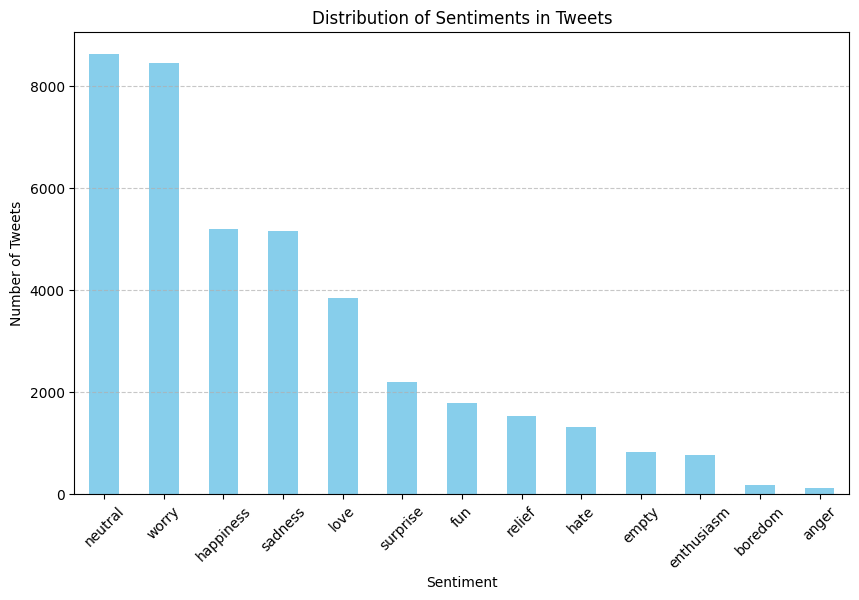

In [455]:
import matplotlib.pyplot as plt

# Count the number of tweets for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [456]:
labels_to_keep = ['neutral', 'worry', 'happiness']

# Filter the DataFrame to keep only the specified labels
df = df[df['sentiment'].isin(labels_to_keep)]

# Shuffle the DataFrame randomly
df = df.reset_index(drop=True)

# Now df_balanced contains the balanced and shuffled DataFrame


As of now, the input and output are texts. But PyTorch (and Machine Learning) only understands numbers. So, we need to convert these to numbers.

Here, the input is Natural Language and output is categorical labels. So, we will preprocess them differently.

### 2.3. One-Hot Encoding: processing the categorical labels

One-hot encoding is a common technique used to convert categorical data into a numerical format for machine learning algorithms. Unlike label encoding, which assigns an integer to each category, one-hot encoding converts categorical variables into a binary matrix representation.

#### What is One-Hot Encoding?

In one-hot encoding, each category is represented by a binary vector. The vector has the same length as the number of unique categories, with a `1` in the position corresponding to the category and `0` in all other positions.

Given a set of categories:

One-hot encoding represents these sentiments as follows (for example):

$$
\begin{aligned}
\text{{"empty"}} &\rightarrow [1, 0, 0, 0] \\
\text{{"sadness"}} &\rightarrow [0, 1, 0, 0] \\
\text{{"enthusiasm"}} &\rightarrow [0, 0, 1, 0] \\
\text{{"neutral"}} &\rightarrow [0, 0, 0, 1] \\
\end{aligned}
$$

#### Mathematical Representation

If \( x \) is a categorical feature with \( n \) unique values, one-hot encoding can be defined as:

$$
\text{{OHE}}(x_i) = [b_1, b_2, \ldots, b_n]
$$

where:

$$
b_j =
\begin{cases}
1 & \text{if } x_i \text{ belongs to category } j \\
0 & \text{otherwise}
\end{cases}
$$

### Advantages and Disadvantages

**Advantages:**

- Removes any assumption of ordinal relationships between categories, unlike label encoding.
- Works well with algorithms that require input to be in a binary format (e.g., neural networks).

**Disadvantages:**

- Increases the dimensionality of the dataset, which can lead to a large number of features if there are many unique categories.
- Sparse representation can increase memory usage and computational complexity.


In [457]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_sentiments = one_hot_encoder.fit_transform(df[['sentiment']])
encoded_df = pd.DataFrame(encoded_sentiments, columns=one_hot_encoder.categories_[0])
df = pd.concat([df, encoded_df], axis=1)

df.head()

,tweet_id,sentiment,content,happiness,neutral,worry
0,1956968416,neutral,@dannycastillo We want to trade with someone w...,0.0,1.0,0.0
1,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,0.0,0.0,1.0
2,1956968636,worry,Hmmm. http://www.djhero.com/ is down,0.0,0.0,1.0
3,1956969456,neutral,cant fall asleep,0.0,1.0,0.0
4,1956969531,worry,Choked on her retainers,0.0,0.0,1.0


### 2.4. Tokenization

Tokenization is a crucial step in Natural Language Processing (NLP) that involves breaking down text into smaller units called tokens. Tokens can be words, characters, or subwords, depending on the type of tokenization applied. This process is essential for converting raw text into a format that machine learning models can process.

We will study advanced tokenization techniques in the course, but for simplicity, we will stick to basic word-based tokenization.

At its core, tokenization is the process of splitting a string of text into meaningful pieces, such as words or subwords. Each of these pieces is called a **token**. For instance, given the sentence:

$$
\text{{"I love deep learning!"}}
$$

Tokenization might break this sentence into the following tokens:

$$
\text{{Tokens}} = \{ \text{{"I"}}, \text{{"love"}}, \text{{"deep"}}, \text{{"learning"}}, \text{{"!"}} \}
$$

Consider the following tweet:

"I love deep learning and NLP!"

Word tokenization would break this content into the following tokens:

$$
\text{{Tokens}} = \{ \text{{"I"}}, \text{{"love"}}, \text{{"deep"}}, \text{{"learning"}}, \text{{"and"}}, \text{{"NLP"}}, \text{{"!"}} \}
$$


In [458]:
def tokenize_df(df):

    def tokenize_text(text):
        arr = [word for word in text.split()]
        return arr

    df['tokenized'] = df['content'].apply(tokenize_text)

    return df

In [459]:
df = tokenize_df(df)

print('input -',df.iloc[0]['content'])
print('Tokens -',df.iloc[0]['tokenized'])

input - @dannycastillo We want to trade with someone who has Houston tickets, but no one will.
Tokens - ['@dannycastillo', 'We', 'want', 'to', 'trade', 'with', 'someone', 'who', 'has', 'Houston', 'tickets,', 'but', 'no', 'one', 'will.']


In [460]:
df.head() #check tokenized column on extreme right

,tweet_id,sentiment,content,happiness,neutral,worry,tokenized
0,1956968416,neutral,@dannycastillo We want to trade with someone w...,0.0,1.0,0.0,"[@dannycastillo, We, want, to, trade, with, so..."
1,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,0.0,0.0,1.0,"[Re-pinging, @ghostridah14:, why, didn't, you,..."
2,1956968636,worry,Hmmm. http://www.djhero.com/ is down,0.0,0.0,1.0,"[Hmmm., http://www.djhero.com/, is, down]"
3,1956969456,neutral,cant fall asleep,0.0,1.0,0.0,"[cant, fall, asleep]"
4,1956969531,worry,Choked on her retainers,0.0,0.0,1.0,"[Choked, on, her, retainers]"


At this point, we have basic pre-processing completed. You can also try more techniques like stemming, lemmatization, stop words removal, etc., for better performance, but we will skip them for now.

### 2.5. Data-splitting

In a typical machine learning workflow, the dataset \( D \) is split into three parts:

$$
D = D_{\text{train}} \cup D_{\text{val}} \cup D_{\text{test}}
$$

- **Training Set (\( D_{\text{train}} \))**: This subset is used to train the model, allowing it to learn the patterns and relationships within the data.
- **Test Set (\( D_{\text{test}} \))**: This subset is used to evaluate the model’s performance on unseen data, providing an estimate of how well the model will generalize to new, unseen data.

The train-test split is crucial for several reasons:

1. **Preventing Overfitting**: By keeping the test set separate from the training data, we can detect if the model is overfitting—i.e., performing well on the training data but poorly on unseen data.
2. **Model Evaluation**: The test set serves as a proxy for new data, allowing us to evaluate the model's performance and estimate its accuracy, precision, recall, and other metrics.
3. **Generalization**: A proper train-test split ensures that the model generalizes well to new data, rather than just memorizing the training data.

Dos:

- Ensure Randomness: Always shuffle your data before splitting to avoid any ordering bias. The random_state parameter in train_test_split ensures reproducibility.
- Maintain Class Distribution: If your dataset is imbalanced (e.g., more instances of one class than another), use stratified splitting to maintain the class distribution across the train and test sets.

Don’ts:

- Don’t Peek at Test Data: Never train or tune your model on the test set. This can lead to overfitting and unrealistic performance estimates.
- Avoid Multiple Tests on the Test Set: Repeatedly testing the model on the same test set can lead to overfitting to the test data. Use cross-validation for model tuning.
- Don’t Ignore Data Leakage: Ensure that no information from the test set leaks into the training process. Data leakage can lead to overly optimistic performance metrics.

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [461]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_dataframe(df, train_ratio=0.7, test_ratio=0.15, val_ratio=0.15, random_state=None):
    assert train_ratio + test_ratio + val_ratio == 1.0, "Ratios must sum to 1"

    # Split the DataFrame into train and remaining (test + validation)
    train_df, remaining_df = train_test_split(df, test_size=(1 - train_ratio), random_state=random_state)

    # Calculate the ratio of test to remaining (test + validation)
    test_size_ratio = test_ratio / (test_ratio + val_ratio)

    # Split the remaining into test and validation sets
    test_df, val_df = train_test_split(remaining_df, test_size=test_size_ratio, random_state=random_state)

    return train_df, test_df, val_df


In [462]:
train_df, test_df, val_df = split_dataframe(df)

### 2.6. Vocabulary Map

A **Vocabulary Class** is a fundamental component in Natural Language Processing (NLP) that is responsible for mapping words or tokens in a dataset to unique numerical identifiers (indices). This mapping allows the conversion of text data into numerical format, which is essential for feeding it into machine learning models.

#### What is a Vocabulary Class?

A Vocabulary Class manages the collection of unique tokens (words, subwords, or characters) in a dataset and assigns each token a unique index. The vocabulary typically includes special tokens that serve specific purposes, such as indicating the start or end of a sequence.

**Basic functionalities of a Vocabulary Class include:**

- **Token-to-Index Mapping**: Converting each token to a unique index.
- **Index-to-Token Mapping**: Converting indices back to tokens (useful for decoding model outputs).
- **Managing Special Tokens**: Handling tokens like padding, unknown words, start-of-sequence, and end-of-sequence.

#### Key Components of a Vocabulary Class

1. **Token-to-Index Mapping**:
   - The main functionality of the vocabulary is to map each unique token in the dataset to a unique integer index. For instance, if your dataset contains the tokens `["I", "love", "NLP"]`, the vocabulary might map them as follows:

     | Token | Index |
     |-------|-------|
     | I     | 1     |
     | love  | 2     |
     | NLP   | 3     |

2. **Index-to-Token Mapping**:
   - This is the inverse operation, which allows converting indices back to their respective tokens. This is useful during the model inference phase to convert model predictions back into human-readable text.

3. **Special Tokens**:
   - **\<PAD\>**: Used for padding sequences to the same length within a batch. This ensures that all sequences in a batch are of uniform length, making them suitable for batch processing.
   - **\<UNK\>**: Represents unknown tokens, i.e., tokens that were not in the training vocabulary. This is essential for handling out-of-vocabulary words during inference.
   - **<SOS\>**: Indicates the start of a sequence. This is commonly used in sequence generation tasks like machine translation or text generation.
   - **\<EOS\>**: Marks the end of a sequence. It helps models know when to stop generating further tokens.
 

#### Why Are Special Tokens Important?

Special tokens play a critical role in text preprocessing and model training:

- **Padding (<PAD>)**: When batching sequences of varying lengths, shorter sequences are padded with `<PAD>` tokens to ensure all sequences in a batch have the same length. This padding is essential for efficient batch processing in deep learning frameworks like PyTorch or TensorFlow.

- **Unknown Token (<UNK>)**: During inference, the model may encounter words that were not seen during training. The `<UNK>` token helps the model handle these situations gracefully, rather than crashing or producing undefined behavior.

- **Start-of-Sequence (<SOS>) and End-of-Sequence (<EOS>)**: In tasks like sequence-to-sequence modeling, it’s important for the model to know when a sequence starts and ends. `<SOS>` and `<EOS>` tokens guide the model during generation and ensure coherent outputs.
    
Dos:

- Include Special Tokens: Always include special tokens in your vocabulary, especially if your task involves sequence generation or varying sequence lengths.
- Handle Out-of-Vocabulary Words: Ensure your vocabulary can handle out-of-vocabulary words by including an <UNK> token, which prevents the model from encountering undefined behavior during inference.
- Only make the vocabulary using the training set: In real-world, you don't have test data. So, to adequately represent that, construct your vocabulary using only training set.


In [463]:
train_df.columns

Index(['tweet_id', 'sentiment', 'content', 'happiness', 'neutral', 'worry',
       'tokenized'],
      dtype='object')

In [464]:
class Vocabulary:
    def __init__(self, add_special_tokens=True):
        self.token_to_index = {}
        self.index_to_token = {}
        self.add_special_tokens = add_special_tokens
        self.special_tokens = ["<PAD>", "<UNK>", "<SOS>", "<EOS>"]
        self.build_special_tokens()

    def build_special_tokens(self):
        if self.add_special_tokens: # add special tokens to vocabulary
            for token in self.special_tokens:
                self.add_token(token)

    def add_token(self, token):
        if token not in self.token_to_index: # if token is not present
            index = len(self.token_to_index) # get as new index
            self.token_to_index[token] = index # assign that index to the token
            self.index_to_token[index] = token # perform the inverse operation too

    def get_index(self, token):
        return self.token_to_index.get(token, self.token_to_index["<UNK>"]) # 
        # if token is present in vocab, return its index, if not present, return the index of unk token

    def get_token(self, index):
        return self.index_to_token.get(index, "<UNK>")
        # if index is present in token, return token, else return UNK token

    def __len__(self):
        return len(self.token_to_index)

    def build_vocab(self, token_list):
        for token in token_list:
            self.add_token(token)

In [465]:
# Initialize the Vocabulary
vocab = Vocabulary(add_special_tokens=True)

# Add tokens from each tweet to the vocabulary
for tokens in train_df['tokenized']: # use only the training set
    vocab.build_vocab(tokens)

# Check the vocabulary size
print("Vocabulary Size:", len(vocab))

# Example: Check the index of a word in the vocabulary
print("Index of 'headache':", vocab.get_index('headache'))

# Example: Check the token for a specific index
print("Token for index 5:", vocab.get_token(5))

print("Token for index 0:", vocab.get_token(0))

# Example: Handling unknown tokens
print("Index of 'Verstappen':", vocab.get_index('Verstappen'))
print("Token for index 355739485:", vocab.get_token(355739485))


Vocabulary Size: 40755
Index of 'headache': 6602
Token for index 5: appears
Token for index 0: <PAD>
Index of 'Verstappen': 1
Token for index 355739485: <UNK>


### 2.7. Understanding `max_len`, Padding, and Truncation in NLP

When working with sequential data, such as text, it's common to encounter sequences of varying lengths. In NLP, these sequences might represent sentences, paragraphs, or entire documents, and their lengths can vary significantly. However, most machine learning models, especially those based on deep learning, require input sequences to be of uniform length. This is where concepts like `max_len`, padding, and truncation become essential.

#### 1. What is `max_len`?

`max_len` is a parameter that defines the maximum length of the sequences that will be fed into the model. Any sequence longer than `max_len` will be truncated, and any sequence shorter than `max_len` will be padded.

#### 2. Why is `max_len` Important?

- **Uniform Input Size**: Deep learning models networks require input sequences to be of the same length. `max_len` ensures that all sequences in a batch have the same length, allowing for efficient batch processing.

- **Memory Management**: Setting an appropriate `max_len` helps in managing memory usage. Sequences that are too long might lead to excessive memory consumption, especially in models like Transformers, where memory usage scales with the square of the sequence length.

- **Model Efficiency**: By limiting the sequence length with `max_len`, you ensure that your model processes only the most relevant parts of the sequence, improving training efficiency and potentially leading to faster convergence.

#### 3. Padding

**Padding** is the process of adding a special token (usually `<PAD>`) to sequences to ensure they reach the specified `max_len`. Padding is typically added to the end of the sequence, but it can also be added at the beginning in some cases.

#### Importance of Padding:

- **Batch Processing**: In machine learning, it’s common to process data in batches for efficiency. However, when dealing with sequences of varying lengths, directly batching them is not possible. Padding allows all sequences to be of the same length, enabling efficient batch processing.

- **No Information Loss**: Padding ensures that no information from shorter sequences is lost, as it only adds neutral tokens that do not contribute to the model’s learning process.

**Example:**
```text
Original sequences:
["I love NLP", "Deep learning is fun", "AI is the future"]

After padding (assuming max_len=5):
["I love NLP <PAD> <PAD>", "Deep learning is fun <PAD>", "AI is the future <PAD> <PAD>"]
```

#### 4. Truncation
Truncation is the process of cutting off sequences that are longer than the specified max_len. This is done to ensure that no sequence exceeds the maximum length, which is crucial for maintaining uniformity in input size.

Importance of Truncation:

Handling Long Sequences: In many NLP tasks, some sequences can be much longer than others. Truncation ensures that these long sequences do not dominate the model’s memory usage or processing time.
Focus on Relevant Information: By truncating sequences, you can focus the model’s attention on the most relevant or important parts of the sequence. For instance, in sentiment analysis, the beginning of a review might be more indicative of sentiment than its middle or end.

**Example:**
```text
Original sequence:
"Natural Language Processing is a fascinating field with many applications in modern technology, ranging from chatbots to machine translation."

After truncation (assuming max_len=10):
"Natural Language Processing is a fascinating field with many"
```

#### 5. Balancing max_len, Padding, and Truncation
Choosing the right max_len involves balancing the trade-offs between truncation and padding:

Too Short max_len: If max_len is too short, many sequences will be truncated, leading to potential loss of important information. This can negatively impact model performance, especially if crucial context is lost.
Too Long max_len: If max_len is too long, most sequences will require a lot of padding, leading to inefficiencies in model training. The model might waste resources processing padding tokens, which do not carry any meaningful information.


In [466]:
# Let us consider we have the following sequence in a batch -
token_lists = [
    ["I", "solemnly", "swear", "that", "I", "am", "up", "to", "no", "good"],
    ["It", "does", "not", "do", "to", "dwell", "on", "dreams", "and", "forget", "to", "live"],
    ["Yer", "a", "wizard", "Harry"],
    ["After", "all", "this", "time?", "Always"]
]

# Converting them into token IDs -

token_ids_list = [[vocab.get_index(token) for token in tokens] for tokens in token_lists]

for i in token_ids_list:
    print(i)


[32, 1, 1505, 78, 32, 653, 174, 55, 334, 13]
[4, 624, 11, 77, 55, 39767, 318, 3943, 30, 581, 55, 47]
[1, 12, 1215, 1]
[5073, 391, 432, 26149, 18514]


What's the problem here? 

Linear algebra works on fixed-size matrices. If we batch it, then size size of matrix will be (4, ?).

So, truncate and pad.

In [467]:
max_len = 8  # Set the maximum length

# Truncate and pad the sequences
padded_token_ids_list = []

for token_ids in token_ids_list:
    # Truncate the sequence to max_len if size > max_len
    if len(token_ids) > max_len:
        token_ids = token_ids[:max_len]
    
    # Pad the sequence if it's shorter than max_len
    if len(token_ids) < max_len:
        token_ids += [vocab.get_index("<PAD>")] * (max_len - len(token_ids))
    
    padded_token_ids_list.append(token_ids)

for i in padded_token_ids_list:
    print(i)

[32, 1, 1505, 78, 32, 653, 174, 55]
[4, 624, 11, 77, 55, 39767, 318, 3943]
[1, 12, 1215, 1, 0, 0, 0, 0]
[5073, 391, 432, 26149, 18514, 0, 0, 0]


In [468]:
# Now, let's assume that you are considering that the average index of a document is a feature 
# of that document on which the output depends.
import torch

padded_tokens = torch.tensor(padded_token_ids_list, dtype=torch.float)

features = torch.mean(padded_tokens, axis=1)
print(features)

# Is this correct?

tensor([ 316.2500, 5599.8750,  153.6250, 6319.8750])


In [469]:
# Solution 1: Masking (Create a mask that identifies padded and non-padded tokens, and use it everywhere)
mask = padded_tokens!=0

print('Mask', mask)
mean_ignoring_padding = torch.sum(padded_tokens.float() * mask, axis=1) / torch.sum(mask, axis=1)
print(mean_ignoring_padding)

# Solution 2: Directly dividing by non-zero elements
count_non_zero_elements = torch.count_nonzero(padded_tokens, axis=1)
mean_ignoring_padding = torch.sum(padded_tokens.float(), axis=1) / count_non_zero_elements
print(mean_ignoring_padding)


# Note, you will never get an error if you do this, but your model will suffer learning.

Mask tensor([[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False]])
tensor([  316.2500,  5599.8750,   307.2500, 10111.7998])
tensor([  316.2500,  5599.8750,   307.2500, 10111.7998])


We don't generally apply mask on the token IDs directly (because it seems redundant. But in a network, we apply mask on the output of layers to nullify any contribution from PAD tokens. We shall see this later.

In [470]:
# We should always keep a mask handy from the token_ids itself, 
# as that is the only place where it's definitely known

# A more robust way to extract mask
pad_token_id = vocab.get_index('<PAD>')
mask = padded_tokens!=pad_token_id

print(mask)

tensor([[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False]])


### 2.8. Creating a PyTorch Dataset

Implementing a custom dataset class in PyTorch is a crucial step for preparing your data for training machine learning models. The dataset class handles data loading, preprocessing, and batching, ensuring that your data is efficiently fed into the model during training. Below is a detailed guide on how to implement a dataset class, along with explanations on how to handle batching and other important aspects.

In PyTorch, the Dataset class is an abstract class that you can inherit from to create your custom dataset. The two primary methods you need to implement are:

__len__(self): Returns the total number of samples in the dataset.

__getitem__(self, idx): Retrieves a single sample from the dataset at the given index idx.

We will create a dataset with padding and truncation like above.

Docs: https://pytorch.org/docs/stable/data.html


In [471]:
import torch
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, dataframe, vocab, max_len=20):
        """
        Args:
            dataframe (pd.DataFrame): The DataFrame containing tokenized texts and labels.
            vocab (Vocabulary): Vocabulary object for token-to-index conversion.
            max_len (int): Maximum length of the sequences (for padding).
        """
        self.dataframe = dataframe
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get the tokenized text and labels from the DataFrame
        tokenized_text = self.dataframe.iloc[idx]['tokenized']
        
        # Get one-hot encoded labels and convert to class index
        # CrossEntropyLoss expects class indices (0, 1, 2, ...), not one-hot vectors
        one_hot_labels = self.dataframe.iloc[idx][['neutral', 'worry', 'happiness']].values.astype(float)
        label = torch.argmax(torch.tensor(one_hot_labels)).item()  # Convert one-hot to class index

        # Convert tokenized text to indices
        token_indices = [self.vocab.get_index(token) for token in tokenized_text]

        # Pad or truncate the sequence to the maximum length
        if len(token_indices) < self.max_len:
            token_indices += [self.vocab.get_index("<PAD>")] * (self.max_len - len(token_indices))
        else:
            token_indices = token_indices[:self.max_len]

        # Convert to tensors
        token_indices = torch.tensor(token_indices)
        return token_indices, label


In [472]:
train_dataset = TextDataset(train_df, vocab, max_len=5)
val_dataset = TextDataset(val_df, vocab, max_len=5)

How to create batches now? With the dataset class, this becomes super simple.

### 2.9. Dataloader

DataLoader is a class in PyTorch’s torch.utils.data module that helps to load data from a dataset in an efficient manner. It manages batching, shuffling, parallel data loading, and more, which are essential for training deep learning models.

- Batching: Splits the dataset into small batches of data, making it easier for the model to process and update weights iteratively.
- Shuffling: Allows shuffling of the data to prevent models from learning the order of samples, enhancing model generalization.
- Parallel Data Loading: Supports loading data in parallel using multiple CPU workers, which speeds up the data loading process.
- Custom Sampling: Works seamlessly with custom samplers like RandomSampler to control how data points are selected.

Docs: https://pytorch.org/docs/stable/data.html

In [473]:
dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Iterate through the DataLoader
for batch_idx, (data, target) in enumerate(dataloader):
    print(f"Batch {batch_idx+1}:")
    print("Data (token indices):", data)
    print("Target (labels):", target)
    if batch_idx > 2:
        break

Batch 1:
Data (token indices): tensor([[38233,  6346,   231,  2420,   370],
        [ 8861,     0,     0,     0,     0],
        [ 1566,    10,   597, 17939,    34],
        [36827,   788, 36828,    23,  2899]])
Target (labels): tensor([2, 2, 1, 1])
Batch 2:
Data (token indices): tensor([[32990,    11,    12, 32991,   989],
        [35444,    43, 35445,   119, 35446],
        [32607, 31657,     0,     0,     0],
        [24235,  1887,   119, 24236,   376]])
Target (labels): tensor([0, 1, 0, 1])
Batch 3:
Data (token indices): tensor([[ 9237,  8198,  3212,   246,    55],
        [ 2229,    55, 10844,    34, 12654],
        [35334,  2953,   353,   155,   432],
        [ 8887,   136,  8888,  8889,   246]])
Target (labels): tensor([0, 0, 0, 1])
Batch 4:
Data (token indices): tensor([[29428, 19035, 18995, 29429,    78],
        [   32,   192,   826,   818,   208],
        [32640,    68,    74,   846,   830],
        [  708, 27866, 27867,   142,    55]])
Target (labels): tensor([1, 1, 1, 2])


### 2.10. Model Architecture

The model consists of the following layers:

1. **Embedding Layer**: Converts tokens into dense vector representations. (Docs: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)
3. **Masking and Summing**: Masks padding tokens and sums the embeddings across the sequence.
4. **Linear Layer**: Applies another linear transformation to the modified embeddings. (Docs: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
5. **Classification Layer**: Outputs the class scores for each input sequence. (Docs: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

The first dimension of input is always the batch size, and all the neural network layers are equipped to handle this scenario. So, for simple operations like forward passes from network layers, you will never need to handle batching explicitly.

In PyTorch, all models are extended from `nn.Module` because it serves as the base class for all neural network modules, providing essential functionalities that are crucial for building and training deep learning models. Here’s why extending from nn.Module is important:

1. Parameter Management
- `nn.Module` automatically registers all the layers (and their parameters) defined within the model. This allows PyTorch to easily access and manage these parameters for operations like training, saving, and loading the model.
2. Forward Propagation
- `nn.Module` defines the structure that allows you to override the forward method, which is where the forward pass of the network is defined. When you extend from nn.Module, you define how data flows through your model by implementing the forward method.
3. Module Nesting
- `nn.Module` allows for the creation of complex models by composing simpler sub-modules. When sub-modules (layers, blocks, etc.) are added as attributes of a custom nn.Module, they are automatically registered and their parameters are included in the parent module’s parameters.
4. Utility Functions
- `nn.Module` provides a variety of utility functions like .to() for moving the model to different devices (CPU/GPU), .eval() and .train() for setting the model’s mode, and methods for saving/loading model parameters.
5. Training and Inference
- By extending from `nn.Module`, your custom model can easily integrate with PyTorch’s training loop utilities like optimizers and loss functions. The backward pass and parameter updates are handled smoothly when using an nn.Module.

Docs: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [474]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNLPModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx=0):
        super(SimpleNLPModel, self).__init__()
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        # First hidden layer for each token's embedding
        self.linear = nn.Linear(embedding_dim, hidden_dim)
        
        # Output layer
        self.classifier = nn.Linear(hidden_dim, output_dim)
        
        # Padding index to be ignored
        self.pad_idx = pad_idx

    def forward(self, x):
        # Step 1: Get embeddings for each token in the batch
        embedded = self.embedding(x)  # Shape: (batch_size, seq_len, embedding_dim)
        
        # Step 2: Create a mask for padding tokens
        mask = (x != self.pad_idx).unsqueeze(-1).float()  # Shape: (batch_size, seq_len, 1)
        
        # Apply mask to embedded
        masked_embedded = embedded * mask  # Shape: (batch_size, seq_len, embedding_dim)
        
        # Step 3: Sum Pooling
        pooled = torch.sum(masked_embedded, dim=1)
        # Shape: (batch_size, embedding_dim)
        
        # Step 4: Apply linear layer to each token embedding
        linear_out = self.linear(pooled)  # Shape: (batch_size, hidden_dim)
        # Apply non-linearity
        linear_out = F.relu(linear_out)
        
        # Step 5: Apply final classification layer
        output = self.classifier(linear_out)  # Shape: (batch_size, output_dim)
        
        return output

In [475]:
vocab_size = len(vocab)
model = SimpleNLPModel(vocab_size, 128, 32, 8)

### 2.11. Forward Pass

Taking a batch input and passing it through the model to get the predictions

In [476]:
batch_input = torch.tensor([0] * 10).reshape(2,5)
model = SimpleNLPModel(vocab_size, 128, 32, 8)

#Executing the below code will run one forward pass on the model
out = model(batch_input)

print(out)
print(out.shape)
# Notice that the first dimension is already two, accounting for the batch. The second dimension is output dimension

tensor([[-0.0676, -0.1328, -0.1230, -0.0406, -0.2027, -0.1491, -0.0697, -0.0282],
        [-0.0676, -0.1328, -0.1230, -0.0406, -0.2027, -0.1491, -0.0697, -0.0282]],
       grad_fn=<AddmmBackward0>)
torch.Size([2, 8])


#### Common Pitfalls

The embedding layer's vocab size should be correctly defined, and all token indices should be between 0 to n-1.

In [477]:
# If you define your vocab size incorectly, and give an index that's < 0 or > len(vocab), you will get an error
batch_input = torch.tensor([len(vocab)+1] * 10).reshape(2,5)
print('Input - ', batch_input)

try:
    out = model(batch_input)
except IndexError as e:
    print('Error -',e)

Input -  tensor([[40756, 40756, 40756, 40756, 40756],
        [40756, 40756, 40756, 40756, 40756]])
Error - index out of range in self


#### Common Pitfalls

Data and model should be on the same device to work.

In [478]:
device = 'cuda' if torch.cuda.is_available() else ('mps' if torch.backends.mps.is_available() else 'cpu')

In [479]:
batch_input = batch_input.to(device=device)
print('Device of batch -', batch_input.device)
print('Device of model -', next(model.parameters()).device)
try:
    out = model(batch_input)
except RuntimeError as e:
    print('Error -',e)

Device of batch - cuda:0
Device of model - cpu
Error - Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)


### 2.12. Softmax 
Softmax is a mathematical function used in machine learning, particularly in classification tasks. It converts raw scores (logits) from a model into probabilities by normalizing them. The output is a probability distribution where each value represents the likelihood of each class, and all probabilities sum up to 1.


Formula:
For a vector $ z = [z_1, z_2, \ldots, z_n] $, the softmax function is given by:
$$
 \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

where  e  is the base of the natural logarithm, $ z_i $ is the raw score for class  i , and the denominator sums over all classes to normalize the scores.

Softmax is commonly used in the final layer of a classification model to output probabilities for each class.

While working with softmax in pytorch, the dim parameter dictates across which dimension the softmax operations is done. Basically, the softmax operation will transform your input into a probability distribution i.e. the sum of all elements will be 1. The below example shows the difference between using dim=0 or dim=1 for a 2D input tensor (supposing the first dimension for the batch size, and the second for the number of classes).

Docs: https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html

In [480]:
# input tensor of dimensions B x C, B = number of batches, C = number of classes.
inputs = torch.rand(size=(4, 4), dtype=torch.float32)
soft_dim0 = torch.softmax(inputs, dim=0)
soft_dim1 = torch.softmax(inputs, dim=1)
print('**** INPUTS ****')
print(inputs)
print('**** SOFTMAX DIM=0 ****')
print(soft_dim0)
print('**** SOFTMAX DIM=1 ****')
print(soft_dim1)

**** INPUTS ****
tensor([[0.5450, 0.7439, 0.9209, 0.6337],
        [0.3915, 0.5613, 0.9154, 0.5675],
        [0.5410, 0.7583, 0.0559, 0.6342],
        [0.0669, 0.2105, 0.2473, 0.0156]])
**** SOFTMAX DIM=0 ****
tensor([[0.2879, 0.2912, 0.3418, 0.2877],
        [0.2469, 0.2426, 0.3399, 0.2693],
        [0.2867, 0.2954, 0.1439, 0.2879],
        [0.1785, 0.1708, 0.1743, 0.1551]])
**** SOFTMAX DIM=1 ****
tensor([[0.2097, 0.2558, 0.3054, 0.2291],
        [0.1974, 0.2339, 0.3333, 0.2354],
        [0.2528, 0.3141, 0.1556, 0.2775],
        [0.2324, 0.2683, 0.2784, 0.2208]])


### 2.13. Backward Pass

Calculating the gradients and updating them. After the forward pass, first, loss will be calculated and then gradients will be calculated.



#### Cross-Entropy Loss

Cross-entropy is a loss function used to measure the difference between two probability distributions. In classification tasks, it measures how well the predicted probability distribution (obtained from softmax) matches the true distribution (actual class labels).

Formula:
For a single data point, cross-entropy loss  L  is given by:
$$
 L = -\sum_{i} y_i \log(p_i)
$$
where:

- $y_i$ is the true probability (usually 1 for the correct class and 0 for others),
- $p_i$ is the predicted probability for class  i .

Usage: Cross-entropy is used to train classification models by minimizing the difference between the predicted probabilities and the actual labels. It is particularly effective in guiding the model to produce accurate probability distributions.

Docs: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [481]:
criterion = nn.CrossEntropyLoss()

#### Common Pitfalls -
1. Both model output (predictions) and labels should be on the same device, of the same shape
2. Both should be float values
3. Softmax is already implemened implicitly in the CrossEntropyLoss. No need to do it again.

In [482]:
batch_input = torch.tensor([1,2,3,4,5,6,7,8,9,10]).reshape(2,5)
model = SimpleNLPModel(vocab_size, 128, 32, 8)
dummy_labels_wrong=torch.tensor([1,2,3,4,5,6,7,8,9,10]).reshape(2,5)
dummy_labels = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,13,12,14,15,16]).reshape(2,8)
#Executing the below code will run one forward pass on the model
out = model(batch_input)

try:
    loss=criterion(out, dummy_labels_wrong)
except RuntimeError as e:
    print('Error -', e)
print('--------------------')

try:
    loss = criterion(out, dummy_labels)
except RuntimeError as e:
    print('Error -', e)
print('--------------------')

dummy_labels = dummy_labels.to(torch.float32)
loss = criterion(out, dummy_labels)
print(loss)

Error - 0D or 1D target tensor expected, multi-target not supported
--------------------
Error - Expected floating point type for target with class probabilities, got Long
--------------------
tensor(143.6992, grad_fn=<DivBackward1>)


In [483]:
# Loop through each parameter in the model to check values and gradients
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Parameter: {name}")
        print(f'Shape: ',param.data.shape)
        print(f"Values: {param.data}")  # Prints the parameter values
        print(f"Gradients: {param.grad}")  # Prints the gradients of the parameters
        print("-------")
        break # (comment to check all layers)


Parameter: embedding.weight
Shape:  torch.Size([40755, 128])
Values: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9228,  2.6708,  1.3182,  ...,  0.0329, -0.1595,  1.5265],
        [ 0.7291, -2.1708, -0.3977,  ...,  0.0572,  0.3429,  2.9076],
        ...,
        [-2.5807, -1.9345,  0.5945,  ...,  1.0261, -0.5123,  0.3241],
        [ 0.0871, -0.5033,  0.6104,  ...,  1.6581, -2.1686,  0.4194],
        [ 0.1642, -1.7390, -0.4171,  ...,  0.4956, -1.1267, -1.7791]])
Gradients: None
-------


In [484]:
loss.backward() # calculates gradient

In [485]:
# Let's check the gradient and values again
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Parameter: {name}")
        print(f"Values: {param.data}")  # Prints the parameter values
        print(f"Gradients: {param.grad}")  # Prints the gradients of the parameters
        print("-------")
        break # (comment to check all layers)


Parameter: embedding.weight
Values: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9228,  2.6708,  1.3182,  ...,  0.0329, -0.1595,  1.5265],
        [ 0.7291, -2.1708, -0.3977,  ...,  0.0572,  0.3429,  2.9076],
        ...,
        [-2.5807, -1.9345,  0.5945,  ...,  1.0261, -0.5123,  0.3241],
        [ 0.0871, -0.5033,  0.6104,  ...,  1.6581, -2.1686,  0.4194],
        [ 0.1642, -1.7390, -0.4171,  ...,  0.4956, -1.1267, -1.7791]])
Gradients: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0898, -0.0463,  0.0999,  ..., -0.1097, -0.0258, -0.0165],
        [ 0.0898, -0.0463,  0.0999,  ..., -0.1097, -0.0258, -0.0165],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
-------


Note, the values of parameters still didn't change. It is because how they is determined through an algorithm, called the Optimizer.

### 2.14. Optimizers
Optimizers are algorithms or methods used to adjust the weights of neural networks to minimize the loss function during training.
They update the model parameters based on the computed gradients from backpropagation, guiding the model towards better performance. Different optimizers, such as SGD (Stochastic Gradient Descent), RMSprop, Adam, etc., have unique ways of adjusting the learning rates and handling gradients, which can impact the speed and stability of training.

The Adam optimizer is chosen because it is efficient, works well with large datasets and models, and often provides faster and more stable convergence than traditional optimizers like SGD.

Docs: https://pytorch.org/docs/stable/optim.html

In [486]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(),lr=0.001) 
# expect model parameters and other hyperparameters like lr, beta, etc., based on the optimizer

In [487]:
optimizer.step() # update weights

In [488]:
# Let's check the gradient and values again
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Parameter: {name}")
        print(f"Values: {param.data}")  # Prints the parameter values
        print(f"Gradients: {param.grad}")  # Prints the gradients of the parameters
        print("-------")
        break # (comment to check all layers)

Parameter: embedding.weight
Values: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9218,  2.6718,  1.3172,  ...,  0.0339, -0.1585,  1.5275],
        [ 0.7281, -2.1698, -0.3987,  ...,  0.0582,  0.3439,  2.9086],
        ...,
        [-2.5807, -1.9345,  0.5945,  ...,  1.0261, -0.5123,  0.3241],
        [ 0.0871, -0.5033,  0.6104,  ...,  1.6581, -2.1686,  0.4194],
        [ 0.1642, -1.7390, -0.4171,  ...,  0.4956, -1.1267, -1.7791]])
Gradients: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0898, -0.0463,  0.0999,  ..., -0.1097, -0.0258, -0.0165],
        [ 0.0898, -0.0463,  0.0999,  ..., -0.1097, -0.0258, -0.0165],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
-------


#### Common pitfall with backward pass

If you see, the weights adjusted, but the model still has gradient values stored. If we repeat this step, gradients of the next batch will be added. This will not throw an error, but internally, it will add the gradients of the next step with current step, and so on. This is not desired in ideal scenario. So, we do an additional step called optimizer.zero_grad() to zero out these accumulated gradients. This helps to start fresh in next batch.

In [489]:
batch_input_2 = torch.tensor([1,2,3,4,5,6,7,8,9,10]).reshape(2,5)
dummy_labels_2 = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,13,12,14,15,16]).reshape(2,8)
dummy_labels_2 = dummy_labels_2.to(torch.float32)
out_2 = model(batch_input_2)
loss = criterion(out_2, dummy_labels_2)
loss.backward()

In [490]:
# Let's check the gradient and values again
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Parameter: {name}")
        print(f"Values: {param.data}")  # Prints the parameter values
        print(f"Gradients: {param.grad}")  # Prints the gradients of the parameters
        print("-------")
        break # (comment to check all layers)

Parameter: embedding.weight
Values: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9218,  2.6718,  1.3172,  ...,  0.0339, -0.1585,  1.5275],
        [ 0.7281, -2.1698, -0.3987,  ...,  0.0582,  0.3439,  2.9086],
        ...,
        [-2.5807, -1.9345,  0.5945,  ...,  1.0261, -0.5123,  0.3241],
        [ 0.0871, -0.5033,  0.6104,  ...,  1.6581, -2.1686,  0.4194],
        [ 0.1642, -1.7390, -0.4171,  ...,  0.4956, -1.1267, -1.7791]])
Gradients: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1674, -0.0687,  0.1752,  ..., -0.2125, -0.0494, -0.0341],
        [ 0.1674, -0.0687,  0.1752,  ..., -0.2125, -0.0494, -0.0341],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
-------


In [491]:
optimizer.zero_grad()

In [492]:
# Now, the gradients are cleared
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Parameter: {name}")
        print(f"Values: {param.data}")  # Prints the parameter values
        print(f"Gradients: {param.grad}")  # Prints the gradients of the parameters
        print("-------")
        break # (comment to check all layers)

Parameter: embedding.weight
Values: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9218,  2.6718,  1.3172,  ...,  0.0339, -0.1585,  1.5275],
        [ 0.7281, -2.1698, -0.3987,  ...,  0.0582,  0.3439,  2.9086],
        ...,
        [-2.5807, -1.9345,  0.5945,  ...,  1.0261, -0.5123,  0.3241],
        [ 0.0871, -0.5033,  0.6104,  ...,  1.6581, -2.1686,  0.4194],
        [ 0.1642, -1.7390, -0.4171,  ...,  0.4956, -1.1267, -1.7791]])
Gradients: None
-------


In [493]:
batch_input_2 = torch.tensor([1,2,3,4,5,6,7,8,9,10]).reshape(2,5)
# CrossEntropyLoss expects 1D tensor of class indices, not 2D one-hot encoded
dummy_labels_2 = torch.tensor([1, 2])  # Class indices for batch of 2 samples
out_2 = model(batch_input_2)
loss = criterion(out_2, dummy_labels_2)
loss.backward()

In [494]:
# Now, the gradients are cleared
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Parameter: {name}")
        print(f"Values: {param.data}")  # Prints the parameter values
        print(f"Gradients: {param.grad}")  # Prints the gradients of the parameters
        print("-------")
        break # (comment to check all layers)

Parameter: embedding.weight
Values: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9218,  2.6718,  1.3172,  ...,  0.0339, -0.1585,  1.5275],
        [ 0.7281, -2.1698, -0.3987,  ...,  0.0582,  0.3439,  2.9086],
        ...,
        [-2.5807, -1.9345,  0.5945,  ...,  1.0261, -0.5123,  0.3241],
        [ 0.0871, -0.5033,  0.6104,  ...,  1.6581, -2.1686,  0.4194],
        [ 0.1642, -1.7390, -0.4171,  ...,  0.4956, -1.1267, -1.7791]])
Gradients: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0145,  0.0018, -0.0114,  ...,  0.0004,  0.0015,  0.0135],
        [-0.0145,  0.0018, -0.0114,  ...,  0.0004,  0.0015,  0.0135],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
-------


If you don't handle them properly, your program won't throw any errors, but not allow your model to train properly. So, please make sure you handle these issues.

### 2.15. Saving Model Weights

When training deep learning models, it's essential to save your model's state so you can resume training later, evaluate the model, or deploy it to production. PyTorch provides mechanisms to save and load different parts of your model, such as:

Model Weights (state_dict): This saves the model's learned parameters.

Entire Model: Saving the entire model includes the model architecture and weights.

Optimizer State: This saves the state of the optimizer, which is important for resuming training with the same learning rate schedule and momentum.

Epoch and Loss Information: Saving the current epoch and loss allows you to resume training from a specific point.

Each of these components is essential depending on your use case. For example, if you only need the model for inference, saving the state_dict might be sufficient. However, if you want to continue training, you'll need to save the optimizer state and epoch information as well.

In [495]:
def save_checkpoint(model, optimizer, epoch, loss, file_path='checkpoint.pth'):
    """
    Saves the model state, optimizer state, current epoch, and loss to a checkpoint file.

    Args:
        model (torch.nn.Module): The model whose state needs to be saved.
        optimizer (torch.optim.Optimizer): The optimizer whose state needs to be saved.
        epoch (int): The current epoch number.
        loss (float): The current loss value.
        file_path (str): The path to the file where the checkpoint will be saved.
    """
    checkpoint = { # create a dictionary with all the state information
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, file_path)
    print(f"Checkpoint saved to {file_path}")

# Example usage:
# save_checkpoint(model, optimizer, epoch, loss)


In [496]:
model = SimpleNLPModel(vocab_size, 128, 32, 5)
batch_input_2 = torch.tensor([1,2,3,4,5,6,7,8,9,10]).reshape(2,5)
# CrossEntropyLoss expects 1D tensor of class indices, not 2D one-hot encoded
dummy_labels_2 = torch.tensor([1, 2])  # Class indices for batch of 2 samples
out = model(batch_input_2)
loss = criterion(out, dummy_labels_2)
optimizer = optim.Adam(model.parameters(),lr=0.0005)

SAVE_DIR = './pytorch_checkpoints'

import os
os.makedirs(SAVE_DIR, exist_ok=True)
save_checkpoint(model, optimizer, 10, loss, './pytorch_checkpoints/demo_1.pth')

Checkpoint saved to ./pytorch_checkpoints/demo_1.pth


In [497]:
def load_checkpoint(file_path, model, optimizer=None, map_location=torch.device('cpu')):
    """
    Loads the model state, optimizer state, current epoch, and loss from a checkpoint file.

    Args:
        file_path (str): The path to the checkpoint file.
        model (torch.nn.Module): The model into which the state will be loaded.
        optimizer (torch.optim.Optimizer, optional): The optimizer into which the state will be loaded. Defaults to None.
        map_location (torch.device, optional): Device to map the storage to when loading. Defaults to CPU.

    Returns:
        int: The epoch at which the training was saved.
        float: The loss value at the time of saving.
    """
    checkpoint = torch.load(file_path, map_location=map_location) # load the checkpoint, ensure correct device
    model.load_state_dict(checkpoint['model_state_dict']) # load the model with model state dict
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict']) # it is important to initialize
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    
    print(f"Checkpoint loaded from {file_path}")
    return epoch, loss

#### Common Pitfall

The architecture of the model/optimizer should be the same as the ones for which weights are saved, otherwise, they are not compatible.

In [498]:
model = SimpleNLPModel(vocab_size, 128, 32, 8) # notice the change in output layer shape
try:
    load_checkpoint('./pytorch_checkpoints/demo_1.pth', model, optimizer)
except RuntimeError as e:
    print('Error -', e)

Error - Error(s) in loading state_dict for SimpleNLPModel:
	size mismatch for classifier.weight: copying a param with shape torch.Size([5, 32]) from checkpoint, the shape in current model is torch.Size([8, 32]).
	size mismatch for classifier.bias: copying a param with shape torch.Size([5]) from checkpoint, the shape in current model is torch.Size([8]).


In [499]:
model = SimpleNLPModel(vocab_size, 128, 32, 5) # these will load randomly initialized weights
# to resume training, you should first load the trained weights of the last epoch
model = model.to(device)
try:
    load_checkpoint('./pytorch_checkpoints/demo_1.pth', model, optimizer)
except RuntimeError as e:
    print('Error -', e)

Checkpoint loaded from ./pytorch_checkpoints/demo_1.pth


Dos and Don'ts

- Do save your model’s state_dict regularly during training, especially when working on long-running experiments.
- Do save the optimizer state if you plan to resume training. Sometimes you dynamically change your learning rate during training, and therefore, re-loading the correct learning rate for that epoch is crucial to resume training.
- Don’t use torch.save() to save the entire model unless you are sure the model class will not change. Saving the state_dict is more flexible and safer.
- Do use map_location when loading a model trained on a different device.

### 2.16. Early Stopping

Early Stopping is a popular regularization technique used in machine learning to prevent overfitting during the training of models, particularly neural networks. It works by monitoring the performance of the model on a validation set and halting the training process when the model’s performance starts to degrade, indicating that further training would lead to overfitting rather than improvements.

In [500]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None  # Initialize with None to correctly handle the first update
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss):
        if self.best_score is None:  # First time, set the best score
            self.best_score = val_loss
        elif val_loss < self.best_score - self.min_delta:  # If the current loss improves over the best score
            self.best_score = val_loss  # Update the best score
            self.counter = 0  # Reset the counter since we have an improvement
        else:
            self.counter += 1  # No improvement
            if self.counter >= self.patience:  # Check if we've hit the patience limit
                self.early_stop = True  # Trigger early stopping


### 2.17. Training Loop

The training loop updates the model's parameters by processing batches of data, calculating loss, and backpropagating gradients to minimize the loss.

In [501]:
import torch.optim as optim
from tqdm import tqdm

In [502]:
# Updated model with dropout for regularization
class RegularizedNLPModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx=0, dropout_rate=0.3):
        super(RegularizedNLPModel, self).__init__()
        self.pad_idx = pad_idx
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        # Add dropout after embedding
        self.embedding_dropout = nn.Dropout(dropout_rate)
        
        # Linear layers with dropout
        self.linear = nn.Linear(embedding_dim, hidden_dim)
        self.hidden_dropout = nn.Dropout(dropout_rate)
        
        # Classification layer
        self.classifier = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Embedding
        embedded = self.embedding(x)  # Shape: (batch_size, seq_len, embedding_dim)
        embedded = self.embedding_dropout(embedded)  # Apply dropout to embeddings
        
        # Create mask for padding tokens
        mask = (x != self.pad_idx).unsqueeze(-1).float()  # Shape: (batch_size, seq_len, 1)
        
        # Apply mask to embeddings
        masked_embedded = embedded * mask  # Shape: (batch_size, seq_len, embedding_dim)
        
        # Average pooling (ignoring padded positions)
        pooled = masked_embedded.sum(dim=1) / mask.sum(dim=1)  # Shape: (batch_size, embedding_dim)
        
        # Linear transformation with dropout
        linear_out = self.linear(pooled)  # Shape: (batch_size, hidden_dim)
        linear_out = torch.relu(linear_out)
        linear_out = self.hidden_dropout(linear_out)  # Apply dropout
        
        # Classification
        output = self.classifier(linear_out)  # Shape: (batch_size, output_dim)
        
        return output


In [503]:
# Updated hyperparameters to reduce overfitting
# Original values that were causing overfitting:
# batch_size = 32
# learning_rate = 0.001
# num_epochs = 20
# embedding_dim = 128
# hidden_dim = 64

# New regularized hyperparameters
batch_size = 16  # Smaller batch size for more noisy gradients
embedding_dim = 64  # Reduced from 128 to decrease model capacity
hidden_dim = 32  # Reduced from 64 to decrease model capacity
learning_rate = 0.0005  # Reduced from 0.001 for slower, more stable learning
num_epochs = 10  # Reduced from 20 to prevent overfitting
dropout_rate = 0.3  # Add dropout for regularization
weight_decay = 1e-4  # L2 regularization

print("Updated Hyperparameters for Overfitting Prevention:")
print(f"Batch Size: {batch_size} (reduced from 32)")
print(f"Learning Rate: {learning_rate} (reduced from 0.001)")
print(f"Epochs: {num_epochs} (reduced from 20)")
print(f"Embedding Dim: {embedding_dim} (reduced from 128)")
print(f"Hidden Dim: {hidden_dim} (reduced from 64)")
print(f"Dropout Rate: {dropout_rate} (new)")
print(f"Weight Decay: {weight_decay} (new)")


Updated Hyperparameters for Overfitting Prevention:
Batch Size: 16 (reduced from 32)
Learning Rate: 0.0005 (reduced from 0.001)
Epochs: 10 (reduced from 20)
Embedding Dim: 64 (reduced from 128)
Hidden Dim: 32 (reduced from 64)
Dropout Rate: 0.3 (new)
Weight Decay: 0.0001 (new)


In [504]:
# Create regularized model and optimizer with weight decay
vocab_size = len(vocab)
regularized_model = RegularizedNLPModel(vocab_size, embedding_dim, hidden_dim, 3, dropout_rate=dropout_rate)
regularized_model = regularized_model.to(device)

# Optimizer with weight decay (L2 regularization)
regularized_optimizer = optim.Adam(regularized_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Loss function
criterion = nn.CrossEntropyLoss()

print(f"Model created with {sum(p.numel() for p in regularized_model.parameters())} parameters")
print(f"Regularized model vs Original model parameter reduction: {sum(p.numel() for p in regularized_model.parameters())} vs ~{128*64 + 64*3 + 128*len(vocab)}")
print("Regularization techniques applied:")
print("- Dropout layers added")
print("- Model capacity reduced")
print("- Weight decay added to optimizer")
print("- Learning rate reduced")
print("- Training epochs reduced")


Model created with 2610499 parameters
Regularized model vs Original model parameter reduction: 2610499 vs ~5225024
Regularization techniques applied:
- Dropout layers added
- Model capacity reduced
- Weight decay added to optimizer
- Learning rate reduced
- Training epochs reduced


In [505]:
# Create new data loaders with smaller batch size
train_loader_reg = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_reg = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Data loaders created with batch size: {batch_size}")
print(f"Training batches: {len(train_loader_reg)}")
print(f"Validation batches: {len(val_loader_reg)}")


Data loaders created with batch size: 16
Training batches: 976
Validation batches: 210


In [506]:
# Enhanced training function with early stopping
def train_model_with_early_stopping(model, optimizer, criterion, train_loader, val_loader, num_epochs, device, 
                                   save_dir, patience=3, min_delta=0.001):
    """
    Trains the model with early stopping to prevent overfitting.
    
    Args:
        patience (int): Number of epochs to wait for improvement before stopping
        min_delta (float): Minimum change in validation loss to qualify as improvement
    """
    os.makedirs(save_dir, exist_ok=True)
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_epoch = 0
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()  # Set model to training mode (enables dropout)
        running_train_loss = 0.0
        
        with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as tepoch:
            for batch_idx, (inputs, targets) in enumerate(tepoch):
                inputs, targets = inputs.to(device), targets.to(device)
                
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                
                running_train_loss += loss.item()
                tepoch.set_postfix(loss=running_train_loss / (batch_idx + 1))
        
        avg_train_loss = running_train_loss / len(train_loader)
        
        # Validation phase
        model.eval()  # Set model to evaluation mode (disables dropout)
        running_val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_val_loss += loss.item()
        
        avg_val_loss = running_val_loss / len(val_loader)
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        
        print(f'Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}')
        
        # Early stopping logic
        if avg_val_loss < best_val_loss - min_delta:
            best_val_loss = avg_val_loss
            best_epoch = epoch
            patience_counter = 0
            # Save best model
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
            }, os.path.join(save_dir, 'best_regularized_model.pth'))
            print(f'New best model saved at epoch {epoch+1}')
        else:
            patience_counter += 1
            print(f'No improvement for {patience_counter} epochs')
        
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            print(f'Best validation loss: {best_val_loss:.4f} at epoch {best_epoch+1}')
            break
    
    return train_losses, val_losses


In [507]:
# Train the regularized model
print("Training regularized model with early stopping...")
reg_train_losses, reg_val_losses = train_model_with_early_stopping(
    regularized_model, 
    regularized_optimizer, 
    criterion, 
    train_loader_reg, 
    val_loader_reg, 
    num_epochs, 
    device,
    './pytorch_checkpoints/regularized_training/',
    patience=3,
    min_delta=0.001
)


Training regularized model with early stopping...


Epoch 1/10: 100%|███████████████| 976/976 [00:09<00:00, 99.69batch/s, loss=1.07]


Epoch 1: Train Loss = 1.0735, Val Loss = 1.0614
New best model saved at epoch 1


Epoch 2/10: 100%|███████████████| 976/976 [00:09<00:00, 99.89batch/s, loss=1.06]


Epoch 2: Train Loss = 1.0603, Val Loss = 1.0540
New best model saved at epoch 2


Epoch 3/10: 100%|██████████████| 976/976 [00:09<00:00, 100.21batch/s, loss=1.05]


Epoch 3: Train Loss = 1.0514, Val Loss = 1.0444
New best model saved at epoch 3


Epoch 4/10: 100%|███████████████| 976/976 [00:09<00:00, 99.47batch/s, loss=1.04]


Epoch 4: Train Loss = 1.0386, Val Loss = 1.0329
New best model saved at epoch 4


Epoch 5/10: 100%|███████████████| 976/976 [00:09<00:00, 99.08batch/s, loss=1.02]


Epoch 5: Train Loss = 1.0215, Val Loss = 1.0229
New best model saved at epoch 5


Epoch 6/10: 100%|█████████████| 976/976 [00:09<00:00, 100.65batch/s, loss=0.994]


Epoch 6: Train Loss = 0.9943, Val Loss = 1.0148
New best model saved at epoch 6


Epoch 7/10: 100%|██████████████| 976/976 [00:09<00:00, 98.40batch/s, loss=0.967]


Epoch 7: Train Loss = 0.9672, Val Loss = 1.0136
New best model saved at epoch 7


Epoch 8/10: 100%|██████████████| 976/976 [00:09<00:00, 99.50batch/s, loss=0.939]


Epoch 8: Train Loss = 0.9389, Val Loss = 1.0119
New best model saved at epoch 8


Epoch 9/10: 100%|██████████████| 976/976 [00:09<00:00, 98.07batch/s, loss=0.899]


Epoch 9: Train Loss = 0.8993, Val Loss = 1.0169
No improvement for 1 epochs


Epoch 10/10: 100%|██████████████| 976/976 [00:10<00:00, 97.48batch/s, loss=0.86]


Epoch 10: Train Loss = 0.8597, Val Loss = 1.0253
No improvement for 2 epochs


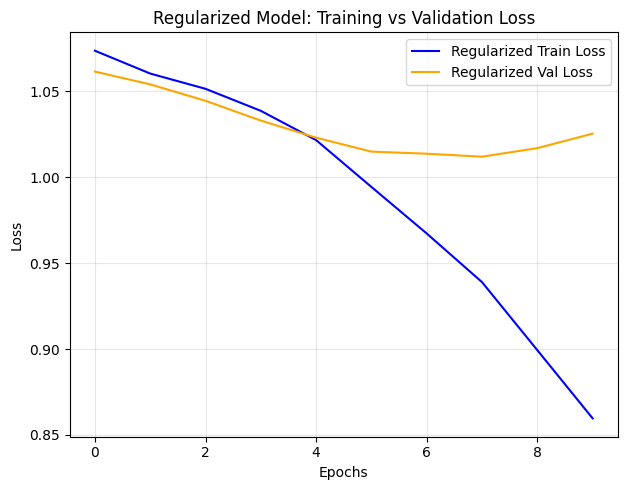


Regularization Results:
Best validation loss: 1.0119 at epoch 8
Final validation loss: 1.0253
✅ Overfitting appears to be reduced - validation loss didn't increase significantly


In [508]:
# Plot comparison between original and regularized training
plt.figure(figsize=(12, 5))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(reg_train_losses, label='Regularized Train Loss', color='blue')
plt.plot(reg_val_losses, label='Regularized Val Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Regularized Model: Training vs Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot comparison if you have original losses (you can uncomment and modify as needed)
# plt.subplot(1, 2, 2)
# plt.plot(original_train_losses, label='Original Train Loss', linestyle='--', alpha=0.7)
# plt.plot(original_val_losses, label='Original Val Loss', linestyle='--', alpha=0.7)
# plt.plot(reg_train_losses, label='Regularized Train Loss')
# plt.plot(reg_val_losses, label='Regularized Val Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Original vs Regularized Model Comparison')
# plt.legend()
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nRegularization Results:")
if len(reg_val_losses) > 1:
    min_val_loss_epoch = reg_val_losses.index(min(reg_val_losses)) + 1
    print(f"Best validation loss: {min(reg_val_losses):.4f} at epoch {min_val_loss_epoch}")
    print(f"Final validation loss: {reg_val_losses[-1]:.4f}")
    
    # Check if overfitting is reduced
    if len(reg_val_losses) >= 3:
        early_val_loss = reg_val_losses[1]  # 2nd epoch
        late_val_loss = reg_val_losses[-1]  # last epoch
        if late_val_loss <= early_val_loss:
            print("✅ Overfitting appears to be reduced - validation loss didn't increase significantly")
        else:
            print("⚠️  Some overfitting may still be present - consider further regularization")
else:
    print("Training completed in 1 epoch or less")


In [509]:
# Example of even more aggressive regularization if needed
aggressive_hyperparams = {
    'batch_size': 8,           # Even smaller batches
    'embedding_dim': 32,       # Much smaller embeddings  
    'hidden_dim': 16,          # Much smaller hidden layer
    'learning_rate': 0.0001,   # Much slower learning
    'num_epochs': 5,           # Fewer epochs
    'dropout_rate': 0.5,       # Higher dropout
    'weight_decay': 1e-3,      # Stronger L2 regularization
    'patience': 2              # Earlier stopping
}

print("Aggressive regularization hyperparameters (use if overfitting persists):")
for param, value in aggressive_hyperparams.items():
    print(f"  {param}: {value}")

print("\nKey takeaways for preventing overfitting:")
print("1. Start with aggressive regularization and gradually relax if underfitting")
print("2. Monitor the gap between training and validation loss")
print("3. Use early stopping to prevent training too long")
print("4. Smaller models often generalize better than larger ones")
print("5. Dropout is one of the most effective regularization techniques")


Aggressive regularization hyperparameters (use if overfitting persists):
  batch_size: 8
  embedding_dim: 32
  hidden_dim: 16
  learning_rate: 0.0001
  num_epochs: 5
  dropout_rate: 0.5
  weight_decay: 0.001
  patience: 2

Key takeaways for preventing overfitting:
1. Start with aggressive regularization and gradually relax if underfitting
2. Monitor the gap between training and validation loss
3. Use early stopping to prevent training too long
4. Smaller models often generalize better than larger ones
5. Dropout is one of the most effective regularization techniques


#### Demos -

1. Show result with learning rate = 0.001
2. In high learning rate, show results by varying early stopping criteria
3. Show result with a very low batch size (4)
4. Show result with learning rate = 0.00001

#### Take Home Analysis -
1. What happens if the embedding dimensions are very high?
2. What happens if embedding dimensions are very low?
3. Same analysis for hidden dimensions

In [550]:
max_len = 300
batch_size = 32
embedding_dim = 256
hidden_dim = 64
learning_rate = 0.00003
patience = 3
min_delta = 0.001
num_epochs = 30

In [551]:
model = SimpleNLPModel(vocab_size, embedding_dim, hidden_dim, 3)
model=model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping instance
early_stopping = EarlyStopping(patience=patience, min_delta=min_delta)

train_dataset = TextDataset(train_df, vocab, max_len=max_len)
val_dataset = TextDataset(val_df, vocab, max_len=max_len)

train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=batch_size)



In [552]:
import torch
from tqdm import tqdm
import os

def train_model(model, optimizer, criterion, train_loader, val_loader, num_epochs, device, save_dir,
                early_stopping=None):
    """
    Trains the model and saves the final model after all epochs are completed.

    Args:
        model (torch.nn.Module): The model to train.
        optimizer (torch.optim.Optimizer): The optimizer for training.
        criterion (torch.nn.Module): The loss function.
        train_loader (torch.utils.data.DataLoader): DataLoader for the training data.
        val_loader (torch.utils.data.DataLoader): DataLoader for the validation data.
        num_epochs (int): Number of epochs to train for.
        device (torch.device): The device (CPU or GPU) to run the model on.
        early_stopping (optional): An early stopping object, if early stopping is desired. Defaults to None.
        save_path (str): The file path to save the final model. Defaults to 'final_model.pth'.
    """
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')

    for epoch in range(num_epochs):  # Defines number of epochs
        model.train()  # Set model to training mode
        running_train_loss = 0.0

        # Training phase
        with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as tepoch:
            for inputs, labels in tepoch:
                inputs, labels = inputs.to(torch.int32), labels.to(torch.int64)
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()  # Zero the gradients

                outputs = model(inputs)  # Forward pass

                loss = criterion(outputs, labels)  # Compute the loss
                loss.backward()  # Backpropagation
                optimizer.step()  # Optimization step

                running_train_loss += loss.item()
                
                # Update tqdm with the current running loss
                tepoch.set_postfix(loss=running_train_loss / (tepoch.n + 1))

        # Calculate average training loss for the epoch
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()  # Set model to evaluation mode
        running_val_loss = 0.0

        # Validation phase
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(torch.int32), labels.to(torch.int64)
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        # Calculate average validation loss for the epoch
        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
        os.makedirs(save_dir, exist_ok=True) # create directory if doesn't exist
        save_path = os.path.join(save_dir, f'checkpoint_{epoch}.pth')
        
        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_save_path = os.path.join(save_dir, 'checkpoint_best.pt')
            save_checkpoint(model, optimizer, epoch, avg_val_loss, file_path=best_save_path)
        
        # Early stopping
        if early_stopping:
            early_stopping(avg_val_loss)
            if early_stopping.early_stop:
                print("Early stopping triggered")
                save_checkpoint(model, optimizer, epoch, avg_val_loss, file_path=save_path)
                break

        save_checkpoint(model, optimizer, epoch, avg_val_loss, file_path=save_path)
    return train_losses, val_losses

In [553]:
train_losses, val_losses = train_model(model, optimizer, criterion, train_loader, val_loader, num_epochs, 'cuda',
                                      './pytorch_checkpoints/model_training', early_stopping)

Epoch 1/30: 100%|████████████████| 488/488 [00:09<00:00, 52.31batch/s, loss=1.2]


Epoch 1/30, Train Loss: 1.1940, Validation Loss: 1.1390
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_0.pth


Epoch 2/30: 100%|███████████████| 488/488 [00:09<00:00, 52.49batch/s, loss=1.13]


Epoch 2/30, Train Loss: 1.1249, Validation Loss: 1.1085
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_1.pth


Epoch 3/30: 100%|███████████████| 488/488 [00:09<00:00, 51.36batch/s, loss=1.09]


Epoch 3/30, Train Loss: 1.0901, Validation Loss: 1.0967
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_2.pth


Epoch 4/30: 100%|███████████████| 488/488 [00:09<00:00, 52.20batch/s, loss=1.07]


Epoch 4/30, Train Loss: 1.0654, Validation Loss: 1.0873
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_3.pth


Epoch 5/30: 100%|███████████████| 488/488 [00:09<00:00, 51.68batch/s, loss=1.06]


Epoch 5/30, Train Loss: 1.0462, Validation Loss: 1.0819
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_4.pth


Epoch 6/30: 100%|███████████████| 488/488 [00:09<00:00, 52.73batch/s, loss=1.04]


Epoch 6/30, Train Loss: 1.0299, Validation Loss: 1.0784
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_5.pth


Epoch 7/30: 100%|███████████████| 488/488 [00:09<00:00, 52.35batch/s, loss=1.02]


Epoch 7/30, Train Loss: 1.0156, Validation Loss: 1.0761
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_6.pth


Epoch 8/30: 100%|███████████████| 488/488 [00:09<00:00, 51.02batch/s, loss=1.01]


Epoch 8/30, Train Loss: 1.0025, Validation Loss: 1.0757
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_7.pth


Epoch 9/30: 100%|██████████████| 488/488 [00:09<00:00, 51.37batch/s, loss=0.996]


Epoch 9/30, Train Loss: 0.9902, Validation Loss: 1.0739
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_best.pt
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_8.pth


Epoch 10/30: 100%|█████████████| 488/488 [00:09<00:00, 52.27batch/s, loss=0.989]


Epoch 10/30, Train Loss: 0.9788, Validation Loss: 1.0743
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_9.pth


Epoch 11/30: 100%|█████████████| 488/488 [00:09<00:00, 51.88batch/s, loss=0.972]


Epoch 11/30, Train Loss: 0.9676, Validation Loss: 1.0743
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_10.pth


Epoch 12/30: 100%|██████████████| 488/488 [00:09<00:00, 52.16batch/s, loss=0.96]


Epoch 12/30, Train Loss: 0.9565, Validation Loss: 1.0745
Early stopping triggered
Checkpoint saved to ./pytorch_checkpoints/model_training/checkpoint_11.pth


In [554]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


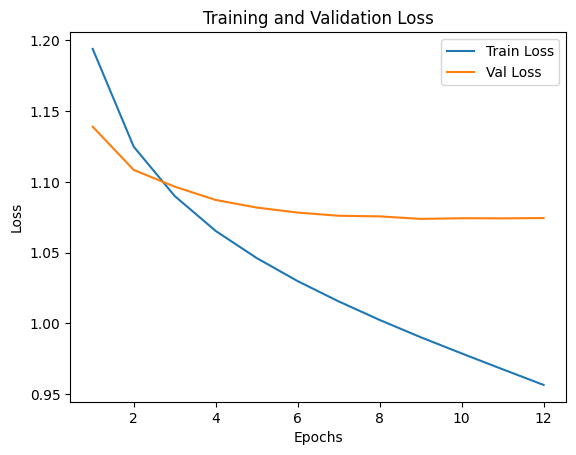

In [555]:
plot_losses(train_losses, val_losses)

### 2.18. Model Inference

In [556]:
import torch
import torch.nn.functional as F

def test_model(model, test_loader, device):
    """
    Tests the model on the test dataset and applies a threshold to the outputs for classification.

    Args:
        model (torch.nn.Module): The trained model to test.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test data.
        device (torch.device): The device (CPU or GPU) to run the model on.

    Returns:
        float: The overall accuracy of the model on the test set.
    """
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    true_labels_all = []
    predicted_labels_all = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(torch.int32), labels.to(torch.int64)
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            outputs = F.softmax(outputs, dim=1) # is doing softmax here necessary? Why? Why not?
            _, predicted = torch.max(outputs, 1)  # Choose the class with the highest score

            # Since labels are now class indices (int64), we don't need torch.max
            # labels are already in the correct format: [0, 1, 2, 1, ...]
            true_labels = labels

            correct += (predicted == true_labels).sum().item()
            total += labels.size(0)
            
            true_labels_all.extend(true_labels.cpu().numpy())
            predicted_labels_all.extend(predicted.cpu().numpy())

    accuracy = correct / total * 100
    print(f"Test Accuracy(%): {accuracy:.4f}")

    return true_labels_all, predicted_labels_all


In [557]:
model = SimpleNLPModel(vocab_size, embedding_dim, hidden_dim, 3)
model=model.to(device)
test_dataset = TextDataset(test_df, vocab, max_len=max_len)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [558]:
true_labels, predicted_labels = test_model(model, test_loader, device)

Test Accuracy(%): 34.5786


3 classes, 33% accuracy - random chance

But we trained the model right? What happened?

In [559]:
epoch, loss = load_checkpoint('./pytorch_checkpoints/model_training/checkpoint_best.pt', model, None, 'cuda')
print('Last epoch=', epoch, 'Last loss=', loss)

Checkpoint loaded from ./pytorch_checkpoints/model_training/checkpoint_best.pt
Last epoch= 8 Last loss= 1.0738731594312758


In [560]:
true_labels, predicted_labels = test_model(model, test_loader, device)

Test Accuracy(%): 44.6204


When evaluating a multi-class classification model, it's essential to understand a variety of metrics to get a comprehensive view of your model's performance. Below are some key metrics:

#### 1. Confusion Matrix

A **Confusion Matrix** is a table that is often used to describe the performance of a classification model. Each row of the matrix represents the instances of the true class, while each column represents the instances of the predicted class. In a multi-class classification scenario, the confusion matrix can provide detailed insight into how well the model is performing for each class.

- **True Positives (TP)**: The number of instances correctly predicted as belonging to a class.
- **False Positives (FP)**: The number of instances incorrectly predicted as belonging to a class.
- **True Negatives (TN)**: The number of instances correctly predicted as not belonging to a class.
- **False Negatives (FN)**: The number of instances incorrectly predicted as not belonging to a class.

The confusion matrix allows you to see not only the accuracy of the predictions but also where the model is getting confused between classes.

#### 2. Precision

**Precision** is a metric that tells us how many of the instances predicted as positive (or as a specific class in multi-class classification) are actually positive (or belong to that class). It is calculated as:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

High precision indicates that the model has a low false positive rate. In a multi-class context, precision is typically averaged across all classes to give a single precision score, often using the **weighted average** to account for class imbalance.

#### 3. Recall

**Recall** (also known as sensitivity or true positive rate) tells us how many of the actual positive instances (or a specific class) were correctly identified by the model. It is calculated as:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

High recall indicates that the model has a low false negative rate. Like precision, recall can also be averaged across all classes.

#### 4. F1 Score

The **F1 Score** is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

The F1 score is especially useful when you need to find a balance between precision and recall, and there is an uneven class distribution (one class might be more frequent than others).

#### 5. Accuracy

**Accuracy** is the simplest and most commonly used metric, which measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of instances:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

While accuracy gives a good general sense of the model’s performance, it might not be the best metric in cases of class imbalance. In such cases, precision, recall, and F1 score provide a more detailed view.

#### How These Metrics are Computed

During model evaluation:
- The **confusion matrix** provides a summary of the predictions made by the model compared to the actual labels.
- **Precision** and **recall** focus on the performance of the model for each class, especially in distinguishing between correct and incorrect predictions.
- The **F1 score** offers a balance between precision and recall, particularly useful when you want to ensure that both false positives and false negatives are minimized.
- **Accuracy** gives an overall measure of how often the model's predictions are correct, but should be interpreted carefully in the presence of class imbalance.

These metrics are essential for understanding the strengths and weaknesses of your classification model, guiding you toward potential improvements or areas needing further tuning.

Docs:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [561]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(len(classes)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

In [562]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def calculate_metrics(all_labels, all_preds):
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')

    return accuracy, f1, precision, recall

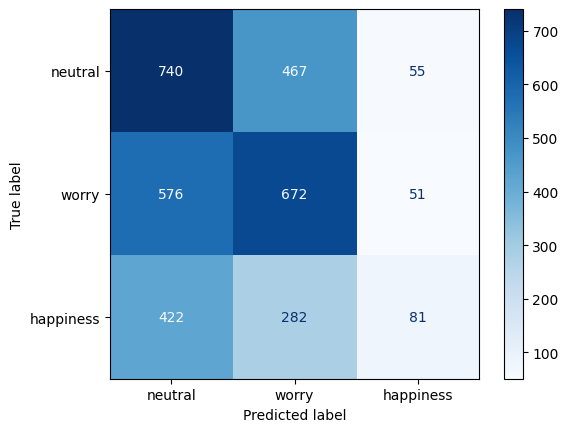

In [563]:
plot_confusion_matrix(true_labels, predicted_labels, classes=['neutral', 'worry', 'happiness'])

In [564]:
accuracy, f1, precision, recall = calculate_metrics(true_labels, predicted_labels)

# Print each metric on a new line
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.4462
F1 Score: 0.4170
Precision: 0.4458
Recall: 0.4462


### 2.19. Predictions

In [565]:
id2label = {
    0: 'neutral',
    1: 'worry',
    2: 'happiness'
}

In [566]:
# For recap, this was our tokenizer
def tokenize_text(text):
    arr = [word for word in text.split()]
    return arr

def predict(text, model):
    tokens = tokenize_text(text)
    ids = []
    for token in tokens:
        id = vocab.get_index(token)
        ids.append(id)
    batch = torch.tensor(ids).unsqueeze(0)
    batch = batch.to(next(model.parameters()).device)
    outputs = model(batch)
    outputs = F.softmax(outputs, dim=1) # is doing softmax here necessary? Why? Why not?
    _, predicted = torch.max(outputs, 1)
    index = predicted.cpu().numpy()
    index = index[0]
    label = id2label[index]
    return label
    
    

In [567]:
model = SimpleNLPModel(vocab_size, embedding_dim, hidden_dim, 3)
model=model.to(device)
epoch, loss = load_checkpoint('./pytorch_checkpoints/model_training/checkpoint_best.pt', model, None, 'cuda')

Checkpoint loaded from ./pytorch_checkpoints/model_training/checkpoint_best.pt


In [568]:
text = 'I am very worried'
predict(text, model)

'neutral'

In [569]:
text = 'I will definitely fail NLP with bad marks and delay my graduation'
predict(text, model)

'worry'

In [570]:
text = 'Good morning, what a great day'
predict(text, model)

'happiness'

In [571]:
text = 'I am sleepy'
predict(text, model)

'worry'

In [572]:
# Sometimes, things are not just captured by embedding of the texts. Tone is important.
text = 'I will pass NLP with good grade' # could be happy, could be neutral, depends
predict(text, model)

'neutral'

#### Other Reasons of Inaccuracies -

1. Our preprocessing was very basic and we used word-tokenization. Typically, NLP systems use more complex preprocessing to clean the data, like removal of stop words, removal of less frequent words, stemming, etc., and use sub-word tokenization. They also handle punctuations differently.
2. We used a very simple feedforward network. This is not very suited for complex NLP tasks, as they don't capture the semantic relationships well. Using RNNs/LSTMs/Transformers will yeild better results.
3. Class imbalance - We can see that the first two classes have around 3500 more data instances than the third class (happiness). This also contributes to inaccuracies, as the training data doesn't represent that. There are ways to avoid this class imbalance problem like over/under sampling, generating synthetic data, etc.

### 2.20 Naive, Regex-based Classifier. 

In this section, we'll create a naive, regex-based classifier as a baseline to compare against our neural network. While we expect this approach to be weaker, it has the advantage of being highly interpretable and can help us understand what patterns might be driving sentiment classification.

Online tools such as [regex101.com](https://regex101.com) is useful for fixing errors in your regex expressions. 

In [573]:
# build naive classifier function which uses hardcoded regex patterns 
# to find the most common bigrams for each sentiment in the test set. 
import re

class RegexSentimentClassifier:
    """
    A naive regex-based sentiment classifier that looks for hardcoded patterns
    associated with each sentiment class.
    """
    
    def __init__(self):
        # Define regex patterns for each sentiment based on our analysis
        # These patterns are hardcoded based on common sentiment indicators
        self.patterns = {
            'happiness': [
                r'\b(happy|joy|excited|great|awesome|wonderful)\b',
                r'[!]{2,}',  # Multiple exclamation marks
                r':\)|:D|:-\)',  # Happy emoticons
            ],
            'worry': [
                r'\b(worry|worried|anxious|stress|stressed)\b',
                r'\b(problem|issue|trouble)\b',
                r':\(|:-\(',  # Sad emoticons
            ],
            'neutral': [
                r'\b(okay|ok|fine|normal|regular|usual|typical)\b',
                r'\b(just|only|simply)\b'
            ]
        }

        # Add the regex patterns from the n-gram analysis
        # self.patterns.update(ngram_regex_patterns)
        
        # Compile regex patterns for efficiency
        self.compiled_patterns = {}
        for sentiment, pattern_list in self.patterns.items():
            self.compiled_patterns[sentiment] = [re.compile(pattern, re.IGNORECASE) for pattern in pattern_list]
    
    def predict(self, text):
        """
        Predict sentiment based on regex pattern matching.
        
        Args:
            text (str): Input text to classify
            
        Returns:
            str: Predicted sentiment ('happiness', 'worry', or 'neutral')
        """
        # Clean the text
        clean_text = text.lower().strip()
        
        # Count matches for each sentiment
        sentiment_scores = {}
        
        for sentiment, patterns in self.compiled_patterns.items():
            score = 0
            for pattern in patterns:
                matches = pattern.findall(clean_text)
                score += len(matches)
            sentiment_scores[sentiment] = score
        
        # Return sentiment with highest score, default to neutral if tie
        if max(sentiment_scores.values()) == 0:
            return 'neutral'  # Default when no patterns match
        
        return max(sentiment_scores, key=sentiment_scores.get)
    
    def predict_batch(self, texts):
        """
        Predict sentiments for a batch of texts.
        
        Args:
            texts (list): List of texts to classify
            
        Returns:
            list: List of predicted sentiments
        """
        return [self.predict(text) for text in texts]
    
    def explain_prediction(self, text):
        """
        Explain why a particular prediction was made by showing matched patterns.
        
        Args:
            text (str): Input text to analyze
            
        Returns:
            dict: Dictionary showing matched patterns for each sentiment
        """
        clean_text = text.lower().strip()
        explanations = {}
        
        for sentiment, patterns in self.compiled_patterns.items():
            matches = []
            for i, pattern in enumerate(patterns):
                found_matches = pattern.findall(clean_text)
                if found_matches:
                    matches.extend([(self.patterns[sentiment][i], found_matches)])
            explanations[sentiment] = matches
        
        return explanations

# Create and test the regex classifier
regex_classifier = RegexSentimentClassifier()

# Test on some examples
# Test on the actual test split of the dataset
test_texts = test_df['content'].tolist()


print("=== REGEX CLASSIFIER PREDICTIONS ===")
for text in test_texts:
    prediction = regex_classifier.predict(text)
    explanation = regex_classifier.explain_prediction(text)
    
    print(f"\nText: '{text}'")
    print(f"Prediction: {prediction}")
    print("Matched patterns:")
    for sentiment, matches in explanation.items():
        if matches:
            print(f"  {sentiment}: {matches}")

=== REGEX CLASSIFIER PREDICTIONS ===

Text: 'random night of fun  now im chillin at home.. happy mothers day!'
Prediction: happiness
Matched patterns:
  happiness: [('\\b(happy|joy|excited|great|awesome|wonderful)\\b', ['happy'])]

Text: '@cowmage  read something happy?'
Prediction: happiness
Matched patterns:
  happiness: [('\\b(happy|joy|excited|great|awesome|wonderful)\\b', ['happy'])]

Text: 'yay, joss is coming over on saturday'
Prediction: neutral
Matched patterns:

Text: 'character designs complete! .... in about a week we'll give another sneak peak... stay posted!'
Prediction: neutral
Matched patterns:

Text: '@Ms_Nigeria oh yeah I know  We met when I was taking out the trash, hhaha'
Prediction: neutral
Matched patterns:

Text: 'Good Morning Campers! I got LOTS of sleep last night! Thank you! Thank you Ash! Thank You!'
Prediction: neutral
Matched patterns:

Text: '@jeremyfritsche your understanding would require taking paragraph 3 out of context. But para5 COULD lead to opting 

=== CLASSIFIER COMPARISON ===
Regex Classifier Accuracy: 0.4199
Neural Network Accuracy: 0.4462
Improvement from Neural Network: 0.0263

=== REGEX CLASSIFIER DETAILED REPORT ===
              precision    recall  f1-score   support

   happiness       0.53      0.28      0.36       785
     neutral       0.40      0.93      0.56      1262
       worry       0.62      0.01      0.02      1299

    accuracy                           0.42      3346
   macro avg       0.52      0.41      0.32      3346
weighted avg       0.52      0.42      0.31      3346


=== REGEX CLASSIFIER CONFUSION MATRIX ===


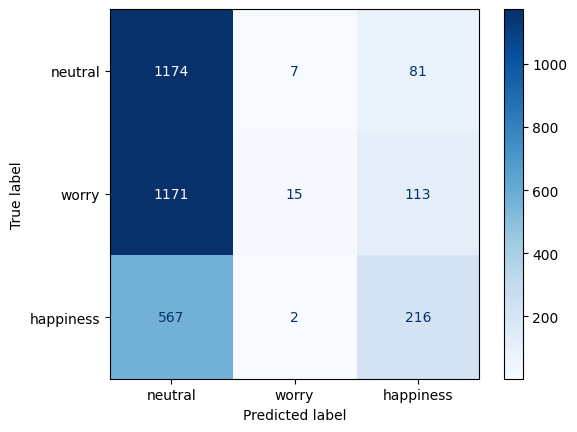

In [574]:
# Convert sentiment labels to match our regex classifier output
label_mapping = {0: 'neutral', 1: 'worry', 2: 'happiness'}

# Get predictions from regex classifier
test_texts = test_df['content'].tolist()
regex_predictions = regex_classifier.predict_batch(test_texts)

# Convert neural network predictions to string labels for comparison
neural_predictions = [label_mapping[pred] for pred in predicted_labels]
true_labels_str = [label_mapping[label] for label in true_labels]

# Calculate metrics for regex classifier
from sklearn.metrics import accuracy_score, classification_report

regex_accuracy = accuracy_score(true_labels_str, regex_predictions)
neural_accuracy = accuracy_score(true_labels_str, neural_predictions)

print("=== CLASSIFIER COMPARISON ===")
print(f"Regex Classifier Accuracy: {regex_accuracy:.4f}")
print(f"Neural Network Accuracy: {neural_accuracy:.4f}")
print(f"Improvement from Neural Network: {neural_accuracy - regex_accuracy:.4f}")

print("\n=== REGEX CLASSIFIER DETAILED REPORT ===")
print(classification_report(true_labels_str, regex_predictions))

# Show confusion matrix for regex classifier
print("\n=== REGEX CLASSIFIER CONFUSION MATRIX ===")
plot_confusion_matrix(
    [{'neutral': 0, 'worry': 1, 'happiness': 2}[label] for label in true_labels_str],
    [{'neutral': 0, 'worry': 1, 'happiness': 2}[label] for label in regex_predictions],
    classes=['neutral', 'worry', 'happiness']
)

In [575]:
def compare_classifiers(texts, true_labels, neural_preds, regex_preds, n_examples=10):
    """
    Compare predictions from both classifiers on sample texts.
    
    Args:
        texts (list): Input texts
        true_labels (list): True sentiment labels
        neural_preds (list): Neural network predictions
        regex_preds (list): Regex classifier predictions
        n_examples (int): Number of examples to show
    """
    print("=== CLASSIFIER COMPARISON ON SAMPLE TEXTS ===")
    print("Format: Text | True | Neural | Regex | Match?")
    print("-" * 80)
    
    for i in range(min(n_examples, len(texts))):
        text = texts[i][:60] + "..." if len(texts[i]) > 60 else texts[i]
        true_label = true_labels[i]
        neural_pred = neural_preds[i]
        regex_pred = regex_preds[i]
        
        # Check if predictions match
        neural_correct = "✓" if neural_pred == true_label else "✗"
        regex_correct = "✓" if regex_pred == true_label else "✗"
        
        print(f"{text}")
        print(f"  True: {true_label} | Neural: {neural_pred} {neural_correct} | Regex: {regex_pred} {regex_correct}")
        
        # Show regex explanation for interesting cases
        if regex_pred != neural_pred:
            explanation = regex_classifier.explain_prediction(texts[i])
            if any(explanation.values()):
                print(f"  Regex reasoning: {explanation}")
        print()

# Compare classifiers on sample texts
compare_classifiers(
    test_texts[:15], 
    true_labels_str[:15], 
    neural_predictions[:15], 
    regex_predictions[:15]
)

=== CLASSIFIER COMPARISON ON SAMPLE TEXTS ===
Format: Text | True | Neural | Regex | Match?
--------------------------------------------------------------------------------
random night of fun  now im chillin at home.. happy mothers ...
  True: happiness | Neural: happiness ✓ | Regex: happiness ✓

@cowmage  read something happy?
  True: neutral | Neural: neutral ✓ | Regex: happiness ✗
  Regex reasoning: {'happiness': [('\\b(happy|joy|excited|great|awesome|wonderful)\\b', ['happy'])], 'worry': [], 'neutral': []}

yay, joss is coming over on saturday
  True: neutral | Neural: neutral ✓ | Regex: neutral ✓

character designs complete! .... in about a week we'll give ...
  True: neutral | Neural: neutral ✓ | Regex: neutral ✓

@Ms_Nigeria oh yeah I know  We met when I was taking out the...
  True: happiness | Neural: worry ✗ | Regex: neutral ✗

Good Morning Campers! I got LOTS of sleep last night! Thank ...
  True: happiness | Neural: worry ✗ | Regex: neutral ✗

@jeremyfritsche your understa

## Summary and Key Learnings

This tutorial provided a comprehensive introduction to PyTorch with a focus on natural language processing (NLP). We covered fundamental PyTorch concepts such as tensors, operations, and device management, then applied these concepts to a real-world NLP task: multi-class text classification using a dataset of tweets annotated with various emotions. Here's a brief summary of what we covered:

1. **Introduction to PyTorch and Tensors:**
   - We explored PyTorch's dynamic computation graph, which allows for flexible and efficient model building, particularly useful in NLP tasks where input data can vary in length and structure.
   - Tensors, the core data structure in PyTorch, were introduced along with basic operations such as indexing, slicing, and arithmetic.

2. **Data Preparation and Preprocessing:**
   - We loaded and explored the tweet dataset, performed one-hot encoding for categorical labels, and implemented basic tokenization.
   - We discussed the importance of padding, truncation, and handling different sequence lengths in NLP, ensuring all input data is of uniform size for model processing, and how to do these correctly.

3. **Building a Vocabulary and DataLoader:**
   - We created a custom Vocabulary class to map tokens to unique indices, including handling special tokens like `<PAD>`, `<UNK>`, `<SOS>`, and `<EOS>`.
   - A custom PyTorch Dataset class was implemented to handle tokenized data, padding, and truncation, and a DataLoader was used to efficiently batch and shuffle the data.

4. **Model Implementation:**
   - We implemented a simple feedforward neural network for text classification, highlighting the importance of embedding layers, masking, and the forward pass.
   - The model was trained using a well-defined training loop, with early stopping to prevent overfitting, and checkpoints were saved to preserve the model's state during training.

5. **Model Evaluation and Inference:**
   - We evaluated the model using a test dataset and calculated common classification metrics like accuracy, precision, recall, and F1 score.
   - A confusion matrix was plotted to visualize model performance across different classes.
   - We explored model inference, using the trained model to predict sentiments for new text inputs.

### Key Learnings

- **PyTorch Flexibility:** PyTorch's dynamic computational graph and tensor operations make it a powerful tool for developing deep learning models, particularly in the NLP domain, where input data can be highly variable.
  
- **Data Preprocessing:** Proper data preprocessing, including tokenization, padding, and truncation, is crucial in NLP tasks to ensure that models can effectively learn from and generalize to diverse text data.

- **Model Building and Training:** Building a neural network in PyTorch involves careful design of layers, loss functions, and optimizers. Early stopping and checkpointing are essential practices to avoid overfitting and ensure the ability to resume training.

- **Evaluation Metrics:** Understanding and applying appropriate evaluation metrics, such as accuracy, precision, recall, and F1 score, is vital for assessing model performance, especially in multi-class classification tasks.

- **Model Inference:** Model inference in NLP requires careful consideration of tokenization and the handling of out-of-vocabulary words. The use of embeddings and proper softmax application are key to making accurate predictions.

### Conclusion

This tutorial provided a solid foundation for using PyTorch in NLP, covering the entire workflow from data preprocessing to model evaluation and inference. While we used a simple feedforward network for demonstration, more advanced models like RNNs, LSTMs, or Transformers would likely yield better performance for complex NLP tasks. The key takeaway is that PyTorch offers the flexibility and tools necessary to build, train, and evaluate deep learning models effectively, making it an excellent choice for NLP and other machine learning tasks.
